# **INICIALIZACIÓN Y CARGA DE DATOS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from matplotlib import rcParams
import seaborn as sns
from datetime import datetime as dt

from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.cluster import dbscan
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.impute import KNNImputer

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
! gdown --fuzzy 'https://drive.google.com/file/d/1upclCey3LZQKTb74seAJ_n9LPQ8V90cr/view?usp=share_link'

Downloading...
From: https://drive.google.com/uc?id=1upclCey3LZQKTb74seAJ_n9LPQ8V90cr
To: /content/marketing_campaign.csv
100% 220k/220k [00:00<00:00, 79.0MB/s]


In [ ]:
df = pd.read_csv('marketing_campaign.csv',sep=';')

# **DECLARACIÓN DE FUNCIONES**

Definición de funciones usadas posteriormente a lo largo del cuaderno.

*   **fancy_dendrogram**: representación gráfica o diagrama de datos en forma de árbol, que organiza los datos en subcategorías que se van dividiendo en otros, hasta llegar al nivel de detalle deseado.

*   **make_spider**: diseñada para visualizar el resultado de la segmentación RFM. El resultado se muestra con el método gráfico de tipo RadarPlot. En el gráfico se visualizan variables cuantitativas representadas en ejes que comienzan desde el mismo punto.

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = sch.dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('Clusters')
        plt.ylabel('Distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
def make_spider( df, row, title, color):
    from math import pi
    # number of variable
    categories=list(df)[:-1]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    #ax.set_rlabel_position(0)
    plt.ylim(df.to_numpy().min(),df.to_numpy().max())

    # Ind1
    values=df.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

# **ANÁLISIS EXPLORATORIO**

In [ ]:
df.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,2012-09-04,2014-03-08,2013-08-21,2014-02-10,2014-01-19
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Podemos observar que contamos con variables númericas. Salvo en el caso de las siguientes columnas:

- Education
- Marital_Status

La columna **Dt_Customer** registra la fecha de la primera compra de cada cliente. A continuación:

- Comprobamos que tenemos registros mínimos y maximos de dos años.

In [ ]:
df['Dt_Customer'].max(), df['Dt_Customer'].min()

('2014-06-29', '2012-07-30')

- Procedemos a cambiar su formato a **datetime**.

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%Y/%m/%d")

- Extraemos el mes-año correspondiente de la fecha posterior a la última compra, efectuada por cualquier cliente.

In [ ]:
hoy = dt.strptime('2014-07', '%Y-%m')

- Declaramos una nueva variable "Seniority". En la que registramos la antigüedad de cada cliente en meses y de cara a una posterior visualización.

In [ ]:
df['Seniority'] = ((hoy - df['Dt_Customer']) / 30).apply(lambda x: x.days).astype('int64')

Con el siguiente primer análisis estadístico, podemos detectar variables que serán tratadas más adelante:

- Year_Birth: encontramos al menos un cliente con más de 100 años.
- Income: de igual manera, hay al menos un cliente con un nivel de ingresos (666.666) muy por encima de la media.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


- Confirmamos que la columna Income es la única que registra hasta 24 valores nulos.

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Seniority               0
dtype: int64

- **Las siguientes columnas no aportan información relevante a nuestro análisis: Complain, Z_CostContact y Z_Revenue. Por lo que procedemos a deshacernos de ellas.**

In [ ]:
df.drop(['Complain', 'Z_CostContact', 'Z_Revenue'],axis=1, inplace=True)

# **SEGMENTACIÓN**

## **Visualización de Datos**

### **Creación de Nuevas Variables**

Declaramos cuatro nuevas variables, en las que registramos las columnas agrupadas según su naturaleza. Más adelante procederemos a visualizar cada una de estas agrupaciones por separado.

In [ ]:
df_info_clientes =          df.filter(['Year_Birth', 'Education', 'Marital_Status', 'Income',
                                       'Kidhome','Teenhome', 'Dt_Customer', 'Recency'])

df_categoria_productos =    df.filter(['MntWines', 'MntFruits', 'MntMeatProducts',
                                       'MntFishProducts', 'MntSweetProducts','MntGoldProds'])

df_tipos_de_venta =         df.filter(['NumDealsPurchases', 'NumWebPurchases',
                                       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'])

df['campañas_publicitarias'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + \
                               df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

A continuación declaramos listas con los nombres de las columnas.
Posteriormente las utilizaremos para generar los títulos de las visualizaciones.

In [ ]:
info_clientes =  ['Year_Birth', 'Education', 'Marital_Status', 'Income',
                  'Kidhome','Teenhome', 'Dt_Customer', 'Recency']

categoria_productos =  ['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts','MntGoldProds']

tipos_de_venta =  ['NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

campañas_publicitarias =  ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                           'AcceptedCmp4',  'AcceptedCmp5', 'Accepted_Last']

Por último vamos a visualizar la distribución de las diferentes agrupaciones establecidas anteriormente.

### **Gráficos con Información de los Clientes**

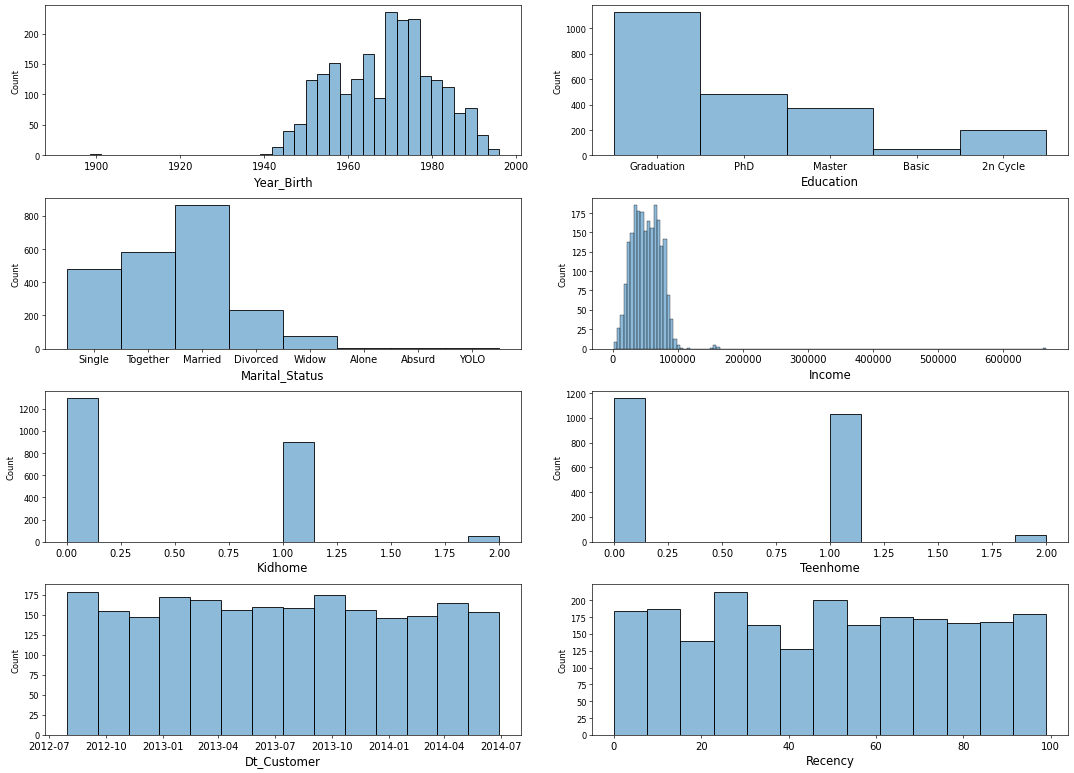

In [ ]:
plt.figure(figsize=(18,13),dpi=60)

for i in range(0, len(info_clientes)):
    plt.subplot(4, 2, i + 1)
    sns.histplot(x = df[info_clientes[i]], alpha = 0.5)
    plt.xlabel(info_clientes[i],fontsize=14)
    plt.xticks(fontsize=12)
    plt.tight_layout()

plt.subplots_adjust(wspace=0.15);

A partir de los gráficos podemos afirmar que:

- Year_Birth --> tenemos un valor extremo con más de 100 años, como comprobamos anteriormente, y que trataremos como outlier. En cuanto a la distribución, observamos que la mayoría de los clientes superan los 40 años de edad, siendo los jovenes una minoría.

- Education --> podemos establecer que la mayoría de los clientes cuentan con un nivel de estudios elevado. Ya que la mayoría han cursado una carrera universitaria o titulaciones superiores.

- Marital_Status --> partimos de ocho categorías de relaciones, estando tres de ellas poco representadas en la muestra (Alone, Absurd, Yolo). El grueso de los clientes se caracterizan por estar casados o en pareja. Siendo la minoría gente soltera, divorciada o viuda. Este hecho nos induce a pensar que sería una buena idea agrupar a los clientes en función de si tienen pareja o no, sea cual sea su naturaleza.

- Income --> la distribución de salarios tiene un rango de entre 1.700 y 100.000 para casi la totalidad de los clientes. La media de la muestra está en 50.000. Mientras que un grupo muy reducido ingresan alrededor de 150.000. Como ya vimos anteriormente, existe un cliente con unos ingresos superiores 600.000. Trataremos a dicho cliente como un outlier, ya que consideramos que puede reducir la eficacia de nuestro análisis.

- Kid_Home --> la mayoría de los clientes no tienen niños pequeños o cuentan con uno a lo sumo, siendo una pequeña minoría los que tienen dos.

- Teen_Home --> el número de hijos adolescentes por cada cliente, sigue una distribucion similar a la de los niños pequeños. La mayoría no tienen hijos adolescentes o cuentan con uno a la sumo. De igual manera, también existe un pequeño grupo de clientes con dos hijos adolescentes.

- Dt_Customer --> en este gráfico podemos observar el acumulado de clientes según su antigüedad en meses. La franja temporal es de dos años (24 meses).

  A primera vista puede parecer que contamos con cantidades similares de
  clientes nuevos y antiguos. Incluso podemos apreciar cierta estacionalidad en
  la distribución de la antigüedad de los mismos. Posteriormente
  agruparemos a los clientes en función de su antigüedad, de cara a poder
  alcanzar mejores conclusiones y aumentar la eficacia de la segmentación.
  
- Recency --> representa el acumulado de clientes por cantidad de días transcurridos desde su última compra (hasta un máximo de 100). No apreciamos variaciones significativas en la distribución de estos valores.

### **Gráficos del Gasto Acumulado de los Clientes por Categoría de Producto**

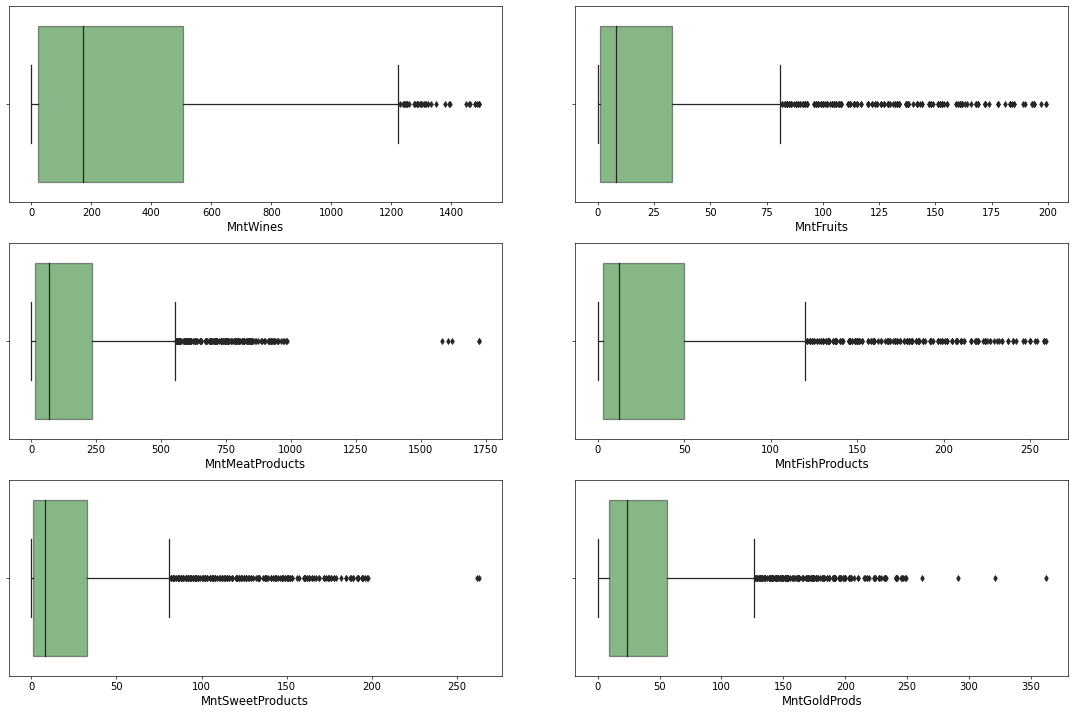

In [ ]:
plt.figure(figsize=(18,12),dpi=60)

for i in range(0, len(categoria_productos)):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x = df[categoria_productos[i]], color = 'green', boxprops=dict(alpha=.5))
    plt.xlabel(categoria_productos[i],fontsize=14)
    plt.xticks(fontsize=12)
    plt.tight_layout()

plt.subplots_adjust(wspace=0.15);

Analizamos la distribución del gasto acumulado de los clientes en cada categoría de producto:

- Wines --> es la categoría con el acumulado de compras más elevado respecto al resto de productos. Podemos observar que el 50% de los clientes han comprado, desde los vinos más económicos hasta algunos cercanos a los 200 dólares. Casi el 50% restante compra vinos con precios comprendidos aproximadamente entre 200 y 1200 dólares. Por último contamos con un pequeño grupo de clientes atípicos que compran vinos por encima de los 1200, alcanzando casi los 1500 dólares.

- Fruits --> su distribución de gasto refleja que el 50% de los clientes compraron fruta por valor de hasta 8 dólares aproximadamente. Otro grupo inferior de clientes adquirieron fruta, de forma más diversa, desde unos 8 hasta un total de 80 dólares. En esta categoría de producto observamos una mayor cantidad de clientes atípicos, que gastaron más de 80 dólares en fruta.

- Meat --> comprobamos que el 50% de los clientes gastaron hasta 67 dólares en carne. Observamos que otro grupo, menos numeroso, adquirió carne por un valor comprendido entre unos 67 y 530 dólares aproximadamente. Otro grupo aún más reducido de atípicos gastaron más de 530 dólares en carne, incluídos 4 clientes con compras en carne cercanas a los 1700 dólares.

- Fish --> su distribución de gasto acumulado muestra que la mitad de los clientes pagaron hasta unos 12 dólares en total. Otro grupo más reducido de clientes llegaron a comprar pescado por un valor comprendido entre 12 y 120 dólares de forma aproximada. Por último cabe destacar que existe una cierta cantidad de clientes atípicos que compraron más de 120 dólares de pescado.

- Sweet --> observamos que la mitad de los clientes compraron hasta unos 8 dólares en total de dulces. Una menor cantidad de clientes gastaron, de forma más diversa, desde 8 a 80 dólares aproximadamente. De igual manera, un número nada despreciable de clientes, pagaron más de 80 dólares en dulces. Incluído un cliente atípico por encima de los 250.

- Gold --> su distribución de gasto acumulado por cliente, refleja que la mitad de los mismos gastaron hasta 24 dólares en productos gold. Una cantidad más ajustada de clientes compraron productos de esta misma categoría, por un valor aproximado comprendido entre 24 y 130 dólares. De igual manera observamos un elevado número de clientes que superaron los 130 dólares en compras de productos gold, con algunos casos atípicos por encima de 250.

### **Gráficos de los Tipos de Venta en el Negocio**

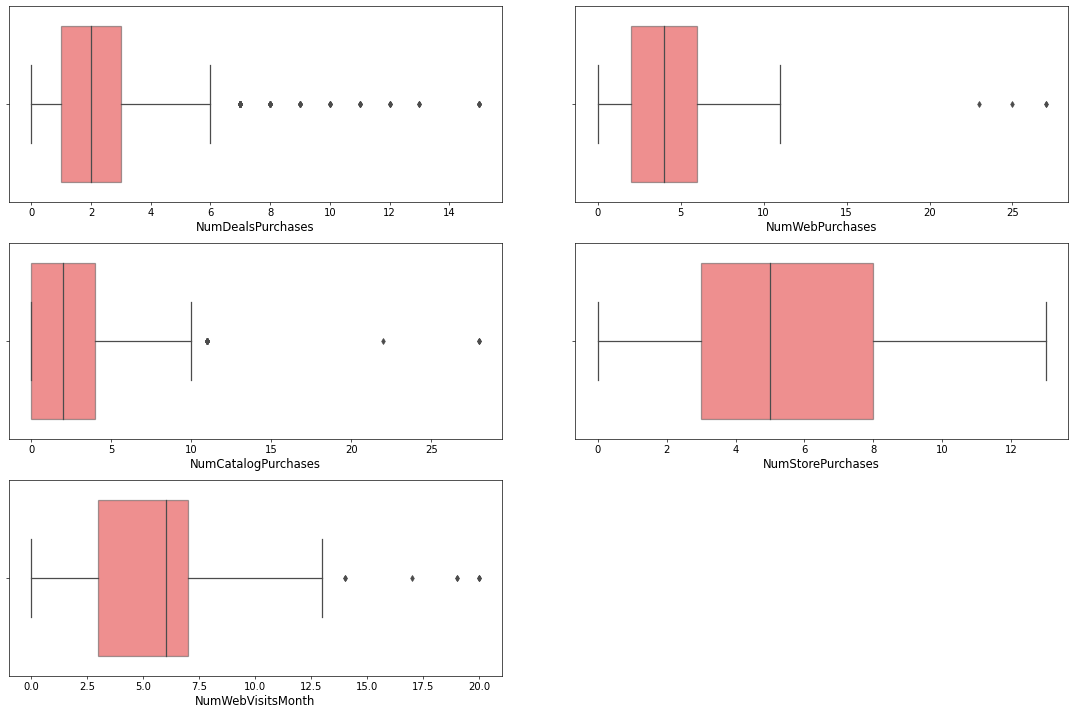

In [ ]:
plt.figure(figsize=(18,12),dpi=60)

for i in range(0, len(tipos_de_venta)):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x = df[tipos_de_venta[i]], color = 'red', boxprops=dict(alpha=.5))
    plt.xlabel(tipos_de_venta[i],fontsize=14)
    plt.xticks(fontsize=12)
    plt.tight_layout()

plt.subplots_adjust(wspace=0.15);

In [ ]:
df_tipos_de_venta.sum()

NumDealsPurchases       5208
NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
NumWebVisitsMonth      11909
dtype: int64

In [ ]:
round(df_tipos_de_venta['NumDealsPurchases'].sum() / (df_tipos_de_venta['NumWebPurchases'] + df_tipos_de_venta['NumCatalogPurchases'] + df_tipos_de_venta['NumStorePurchases']).sum() * 100,2)

18.55

A partir de estas visualizaciones por tipo de venta y la suma de ventas de cada tipo, podemos determinar:

- NumDealsPurchases --> comprobamos que las ventas en oferta suponen el 18% de las ventas totales. No contamos con la cantidades correspondientes de compras con descuento realizadas a traves de la tienda física, por catálogo y por la web.

  Respecto a la distribucion de los clientes, comprobamos que la mitad han
  comprado dos o menos productos en oferta. Otra cantidad más ajustada de
  clientes han comprado entre dos y seis artículos en oferta.
  Respecto al resto de clientes, existen ocho clientes atípicos que han
  comprado más de 6 productos en oferta.

- NumWebPurchases --> de igual manera podemos observar que el 50% de los clientes han comprado hasta 4 productos por web. Casi la totalidad del 50% restante de clientes alcanzan entre 4 y 11 compras en la web aproximadamente. Contamos con tres clientes atípicos que han comprado más de 20 productos.

- NumCatalogPurchases --> su distribución refleja dos grupos: una mitad inferior de clientes que han comprado hasta dos productos, y otra mitad que van desde dos hasta diez compras por catálogo. También existen un par de clientes atípicos que adquirieron más de diez productos por esta vía.

- NumStorePurchases --> observamos un comportamiento más regular en las compras en tienda física, sin datos atípicos. La mitad de los clientes han realizado hasta cinco compras en tienda, mientras que la mitad restante han comprado desde 5 hasta trece productos aproximadamente.

- NumWebVisitsMonth --> entedemos que no es una variable que podamos aprovechar. Ya que únicamente refleja las visitas de cada cliente a la web en el último mes. También hay que tener en cuenta que los datos de compra en tienda, web o por catálogo comprenden una escala temporal mayor a 1 mes. Por lo que es difícil alcanzar conclusiones provechosas, como sería el caso de la tasa de conversión (ej: compras en web / visitas a la web).

  **A continuación procedemos a eliminar esta variable.**

In [ ]:
df.drop('NumWebVisitsMonth',axis=1, inplace=True)

### **Gráfico de la Respuesta Acumulada a las Campañas Publicitarias**

Antes de nada, hay que aclarar que no contamos con ninguna marca de tiempo para ninguna de las seis campañas. Al igual que tampoco conocemos su duración. Por lo que no podemos encontrar una relación directa entre el lanzamiento de cada campaña y su repercusión en el aumento de clientes, su antigüedad o la evolución de las ventas en cada categoría de productos.

In [ ]:
df.rename(columns={'Response':'Accepted_Last'},inplace=True)

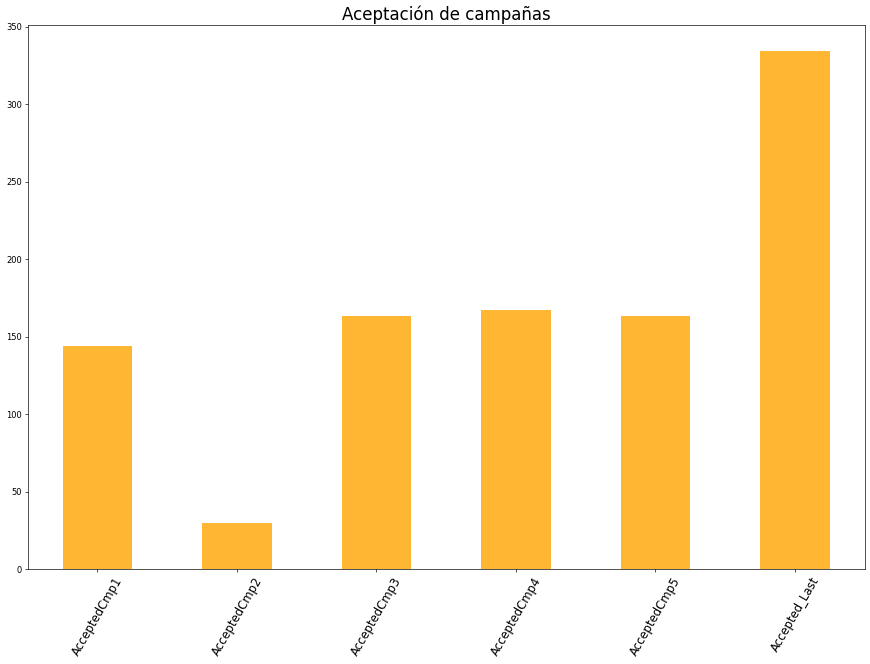

In [ ]:
plt.figure(figsize=(18,12),dpi=60)

df[campañas_publicitarias].sum().plot.bar(color = 'orange', alpha = 0.8)
plt.title('Aceptación de campañas', fontsize= 20)
plt.xticks(rotation = 60, fontsize= 14);

A partir del gráfico podemos establecer que:

- Observamos una aceptación similar para la mayoría de las campañas. Salvo en los casos de la segunda y de la última. En las que apreciamos un claro descenso e incremento, que apriori no podemos justificar.

- Posteriormente intentaremos analizar la sensibilidad de cada tipo de cliente ante cada una de estas campañas.

## **Feature Engineering**

### **Tratamiento de Missings**
Como vimos anteriormente tenemos 24 nulos en la columna de ingresos. Para su tratamiento hemos seguido los siguientes pasos:

- Debemos encontrar patrones que puedan relacionar a estos clientes con ingresos nulos. Por lo que en primer lugar recuperamos el nivel de educación y año de nacimiento de cada cliente, obteniendo valores muy diversos.

In [ ]:
df.filter(['ID','Income','Education','Year_Birth'])[df['Income'].isnull()].reset_index().drop(columns='index')

,ID,Income,Education,Year_Birth
0,1994,NaN,Graduation,1983
1,5255,NaN,Graduation,1986
2,7281,NaN,PhD,1959
3,7244,NaN,Graduation,1951
4,8557,NaN,Graduation,1982
5,10629,NaN,2n Cycle,1973
6,8996,NaN,PhD,1957
7,9235,NaN,Graduation,1957
8,5798,NaN,Master,1973
9,8268,NaN,PhD,1961


- A partir de la obtención de estos valores, nos decidimos a utilizar un algoritmo Knn para obtener el salario faltante de cada uno de estos clientes. De esta manera equiparamos sus variables a las de sus vecinos.

- Almacenamos esta visualización junto con su ID en una nueva variable y de cara a una comprobación posterior.

In [ ]:
comprobacion_de_nulos = df[df['Income'].isnull()]

- Utilizamos LabelEncoder para generar una columna de educación que sea numérica. Ya que el algoritmo Knn no trabaja con variables categóricas.

In [ ]:
le = LabelEncoder()
df['Education_Category'] = le.fit_transform(df['Education'])

- Ejecutamos el algoritmo en base los 5 vecinos más cercanos, imputando los valores nulos a los indicados por el algoritmo.

- A continuación procedemos a entrenar el modelo de Knn. Calculando los valores de la variable Income, en función de los valores correspodientes de Year_Birth y Education_Category de sus vecinos.

In [ ]:
imputer = KNNImputer()
imputer = KNNImputer(n_neighbors=5,metric='nan_euclidean')

imputer.fit(df[['Income','Year_Birth','Education_Category']])

X = imputer.transform(df[['Income','Year_Birth','Education_Category']])
Income_impute=pd.DataFrame(X,columns=['Income','Year_Birth','Education_Category'])
df['Income']=Income_impute['Income'].reset_index(drop=True)

- Tras la transformación de las variables, procedemos a visualizar los valores resultantes.

In [ ]:
df.filter(['ID','Income','Education','Year_Birth']).merge(comprobacion_de_nulos.filter(['ID']), on='ID', how='inner')

,ID,Income,Education,Year_Birth
0,1994,47284.4,Graduation,1983
1,5255,40242.0,Graduation,1986
2,7281,54318.0,PhD,1959
3,7244,69814.4,Graduation,1951
4,8557,45125.4,Graduation,1982
5,10629,32924.6,2n Cycle,1973
6,8996,43628.6,PhD,1957
7,9235,50588.2,Graduation,1957
8,5798,43847.2,Master,1973
9,8268,66783.4,PhD,1961


- Verificamos que los valores resultantes del algoritmo Knn son más realistas que las imputaciones de la media o mediana de ingresos. Ya que dicho algoritmo ha tenido en cuenta variables adicionales (año de nacimiento y educación) de clientes similares.

### **Tratamiento de Outliers**
Para el tratamiento de datos atípicos en la variable de año de nacimiento se han seguido los siguientes pasos:

- Tomamos como referencia del año vigente el correspondiente al de la última compra registrada en el dataset.  

- Para establecer la edad de cada cliente restamos al año vigente (2014) su año de nacimiento correspondiente.

In [ ]:
df['Age'] = 2014 - df['Year_Birth']

- De cara a no sesgar la segmentación de clientes, eliminamos todos aquellos con edades superiores a 100 años.

In [ ]:
df = df[df['Age'] < 100]

- A continuación procedemos a visualizar la distribución de edades de los clientes.

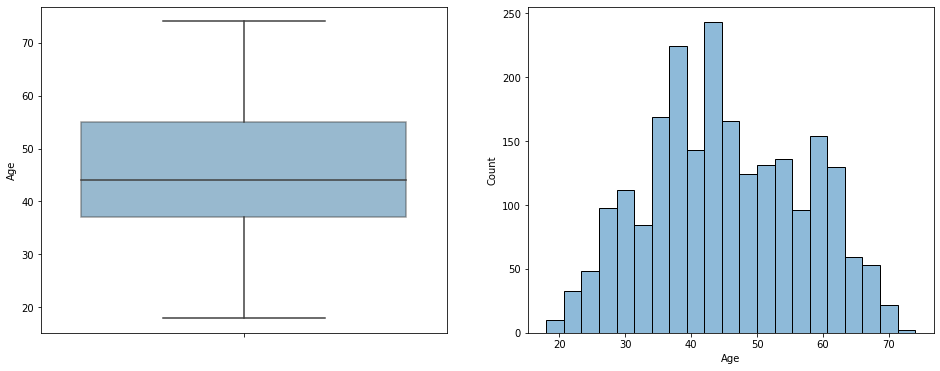

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(y = 'Age',data = df, ax = axs[0], boxprops=dict(alpha=.5))
sns.histplot(x = 'Age', data = df, ax = axs[1], alpha = 0.5)

plt.show();

- Observamos que la edad del mayor número de clientes se sitúa aproximadamente entre 37 y 55 años.

- El acumulado de edad por clientes refleja una distribución similar a una normal o Gaussiana.

- Por último nos deshacemos de la columna original año de nacimiento, pues la consideramos información redundante.

In [ ]:
df.drop('Year_Birth',axis=1, inplace=True)

Para el tratamiento de datos atípicos en la variable Income se han seguido los siguientes pasos:

- Decidimos quedarnos con todos aquellos clientes con salarios inferiores a 200.000 dólares.

In [ ]:
df = df[df['Income'] < 200000]

- Al graficar los resultados, observamos que todavía mantemos un reducido grupo de clientes con altos ingresos. Vamos a mantenerlos porque consideramos que pueden ser relevantes de cara a análisis posteriores.

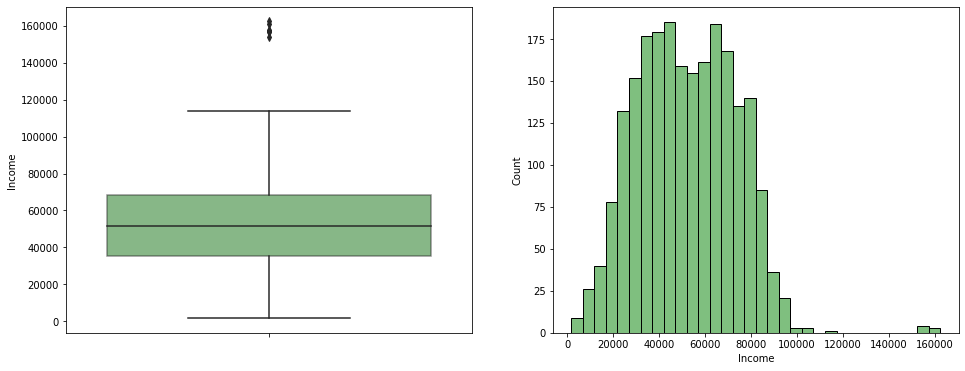

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(y = 'Income',data = df, ax = axs[0], boxprops=dict(alpha=.5),color = 'green')
sns.histplot(x = 'Income', data = df, ax = axs[1], alpha= 0.5 ,color = 'green')

plt.show();

- Observamos que el nivel de ingresos del mayor número de clientes se sitúa aproximadamente entre 37.000 y 70.000 dólares.

- El acumulado de ingresos por clientes refleja una distribución similar a una normal o Gaussiana.

### **Manipulación y Creación de Variables Categóricas.**

Necesitamos establecer unas variables categóricas (u optimizar las ya existentes) que cumplan las siguientes condiciones:

- Puedan agrupar los valores de otras variables (ya sean categóricas o numéricas).

- Aumenten el valor de la información original.

- Nos permitan responder a preguntas e hipótesis de negocio.

- Faciliten su integración en los algoritmos que emplearemos posteriormente (ejemplo: algoritmo apriori)

- Comenzamos agrupando y etiquetando los diferentes niveles de educación en "Pregrade" y "PostGrade".

In [ ]:
df = df.assign(Education= lambda x: x.Education.map(lambda value: 'Pregrade' if value == 'Basic' else
                                                                  'Pregrade' if value == '2n Cycle' else 'PostGrade'))

- Continuamos uniendo diversas variables, relacionadas con el estado civil, bajo las etiquetas "Together" o "Single".

In [ ]:
df = df.assign(Marital_Status = lambda x: x.Marital_Status.map(lambda value: 'Together' if value == 'Married' else
                                                                             'Together' if value == 'Together' else 'Single'))

- Registramos la suma de lo hijos menores de edad de cada cliente, ya sean niños o adolescentes, en la variable "Num_Children".

- Aprovechamos esta misma variable para generar una adicional "Has_Children", en la que categorizamos etiquetando si el cliente tiene algún niño ('Yes') o no ('No').

In [ ]:
df = df.assign( Num_Children = df['Kidhome'] + df['Teenhome'],
                Has_Children = lambda x: x.Num_Children.map(lambda value: 'Yes' if value >= 1 else 'No'))

- Contamos con tres variables numéricas de carácter continuo ('Income', 'Age' y 'Seniority').

- Procedemos a segmentar sus valores en 4 partes iguales.

- Al mismo tiempo que aprovechamos el orden de estos nuevos segmentos, asignándoles una etiqueta de score o puntuación.

- Esta etiqueta se corresponde con la naturaleza de las variables originales.

- Registramos en tres nuevas variables ('Income_Score', 'Age_Score', 'Recency_Score' y 'Seniority_Score') cada una de las nuevas etiquetas de segmentación que hemos creado.

In [ ]:
df['Income_Score'] = pd.cut(df['Income'], [1500, 35000, 50000, 70000, 165000], labels=['Ingresos_Bajos', 'Ingresos_Medios', 'Ingresos_Altos', 'Ingresos_TOP'])
df['Age_Score'] = pd.cut(df['Age'], [26, 38, 50, 65, 82], labels=['Jovenes','Adultos','Mediana_Edad','Mayores'])
df['Seniority_Score'] = pd.cut(df['Seniority'], [0, 6, 12, 18, 24], labels=['0-6 meses', '6-12 meses', '12-18 meses', '18-24 meses'])
df['Recency_Score'] =  pd.qcut(df['Recency'], q=5, labels=['1-6 dias', '6-12 dias', '12-18 dias', '18-24 dias','24-30 dias'])

- Procedemos a visualizar el aspecto de las nuevas variables generadas.

In [ ]:
df.filter([ 'Education','Marital_Status','Num_Children','Has_Children','Income_Score','Age_Score','Seniority_Score']) \
  .head(3)

,Education,Marital_Status,Num_Children,Has_Children,Income_Score,Age_Score,Seniority_Score
0,PostGrade,Single,0,No,Ingresos_Altos,Mediana_Edad,18-24 meses
1,PostGrade,Single,2,Yes,Ingresos_Medios,Mediana_Edad,0-6 meses
2,PostGrade,Together,0,No,Ingresos_TOP,Adultos,6-12 meses


Cabe recordar que también contamos con otras 6 variables, que registran el acumulado numérico de compras, de cada categoría de producto y para cada uno de los clientes.   

- Procedemos a segmentar sus valores en 4 partes. En la primera agrupamos todos aquellos clientes que no han adquirido productos de esa categoría determinada. Establecemos 3 secciones adicionales del rango de acumulado de compras, que va desde el importe mínimo hasta el máximo.

- Al mismo tiempo que aprovechamos el orden de estos nuevos segmentos, asignándoles una etiqueta que refleja la calidad del cliente como comprador de esa determinada categoría de producto.

- Registramos en 6 nuevas variables ('Wine_Client_Quality', 'Fruits_Client_Quality', 'Meat_Client_Quality', 'Fish_Client_Quality', 'Sweet_Client_Quality' y 'Delicatessen_Client_Quality') cada una de las nuevas etiquetas de segmentación que hemos creado.

- Por último mostramos el resultado por pantalla.

In [ ]:
df['Wine_Client_Quality']   = pd.cut(df['MntWines'],  [0, 0.99, 492, 985, 1493], labels=['No_Consumidor', 'Bajo_Consumo', 'Consumidor_Frecuente', 'Mayor_Consumidor']).fillna('No_Consumidor')
df['Fruits_Client_Quality'] = pd.cut(df['MntFruits'], [0, 0.99, 65, 131, 199], labels=['No_Consumidor', 'Bajo_Consumo', 'Consumidor_Frecuente', 'Mayor_Consumidor']).fillna('No_Consumidor')
df['Meat_Client_Quality']     = pd.cut(df['MntMeatProducts'], [0, 0.99, 569, 1138, 1725], labels=['No_Consumidor', 'Bajo_Consumo', 'Consumidor_Frecuente', 'Mayor_Consumidor']).fillna('No_Consumidor')
df['Fish_Client_Quality']   = pd.cut(df['MntFishProducts'], [0, 0.99, 85, 170, 259], labels=['No_Consumidor', 'Bajo_Consumo', 'Consumidor_Frecuente', 'Mayor_Consumidor']).fillna('No_Consumidor')
df['Sweet_Client_Quality']     = pd.cut(df['MntSweetProducts'], [0, 0.99, 86, 173, 263], labels=['No_Consumidor', 'Bajo_Consumo', 'Consumidor_Frecuente', 'Mayor_Consumidor']).fillna('No_Consumidor')
df['Delicatessen_Client_Quality']  = pd.cut(df['MntGoldProds'], [0, 0.99, 119, 238, 362], labels=['No_Consumidor', 'Bajo_Consumo', 'Consumidor_Frecuente', 'Mayor_Consumidor']).fillna('No_Consumidor')

In [ ]:
df.filter(['Wine_Client_Quality','Fruits_Client_Quality','Meat_Client_Quality',
            'Fish_Client_Quality','Sweet_Client_Quality','Delicatessen_Client_Quality']) \
   .head(3)

,Wine_Client_Quality,Fruits_Client_Quality,Meat_Client_Quality,Fish_Client_Quality,Sweet_Client_Quality,Delicatessen_Client_Quality
0,Consumidor_Frecuente,Consumidor_Frecuente,Bajo_Consumo,Mayor_Consumidor,Consumidor_Frecuente,Bajo_Consumo
1,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo
2,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo,Consumidor_Frecuente,Bajo_Consumo,Bajo_Consumo


### **Análisis de Variables Categóricas**
Vamos a estudiar las variables categóricas creadas en el apartado anterior, a través de la visualización de la distribución de sus valores.

In [ ]:
df_categoricas_cliente = df.filter(['Education','Marital_Status','Num_Children','Has_Children','Income_Score','Age_Score','Seniority_Score'])

categoricas_cliente = ['Education','Marital_Status','Num_Children','Has_Children','Income_Score','Age_Score','Seniority_Score']

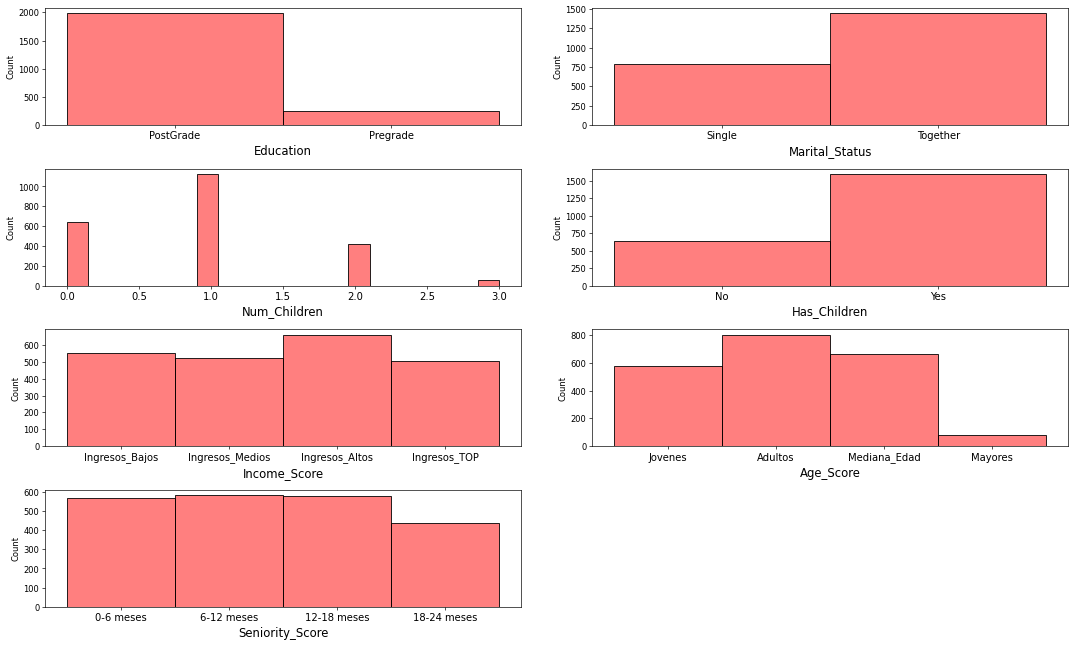

In [ ]:
plt.figure(figsize=(18,13),dpi=60)

for i in range(0, len(categoricas_cliente)):
    plt.subplot(5, 2, i + 1)
    sns.histplot(x = df[categoricas_cliente[i]],color = 'red', alpha = 0.5)
    plt.xlabel(categoricas_cliente[i],fontsize=14)
    plt.xticks(fontsize=12)
    plt.tight_layout()

plt.subplots_adjust(wspace=0.15);

- Observamos un gran sesgo en la distribución de los valores de las variables "Education", "Marital_Status" y "Has_Children". Este hecho nos invita a pensar que el perfil más común de cliente es el que cuenta con estudios superiores, vive en pareja y tiene al menos un hijo menor de edad.

- El número de hijos mayores de edad más común entre los clientes es 1.

- Las variables "Income_Score", "Age_Score" y "Seniority_Score" reflejan una distribución más homogénea. Siendo los clientes de mayor edad los menos comunes en la muestra.

In [ ]:
df_categoricas_producto = df.filter(['Wine_Client_Quality','Fruits_Client_Quality','Meat_Client_Quality',
                                     'Fish_Client_Quality','Sweet_Client_Quality','Delicatessen_Client_Quality'])

categoricas_producto = ['Wine_Client_Quality','Fruits_Client_Quality','Meat_Client_Quality',
                        'Fish_Client_Quality','Sweet_Client_Quality','Delicatessen_Client_Quality']

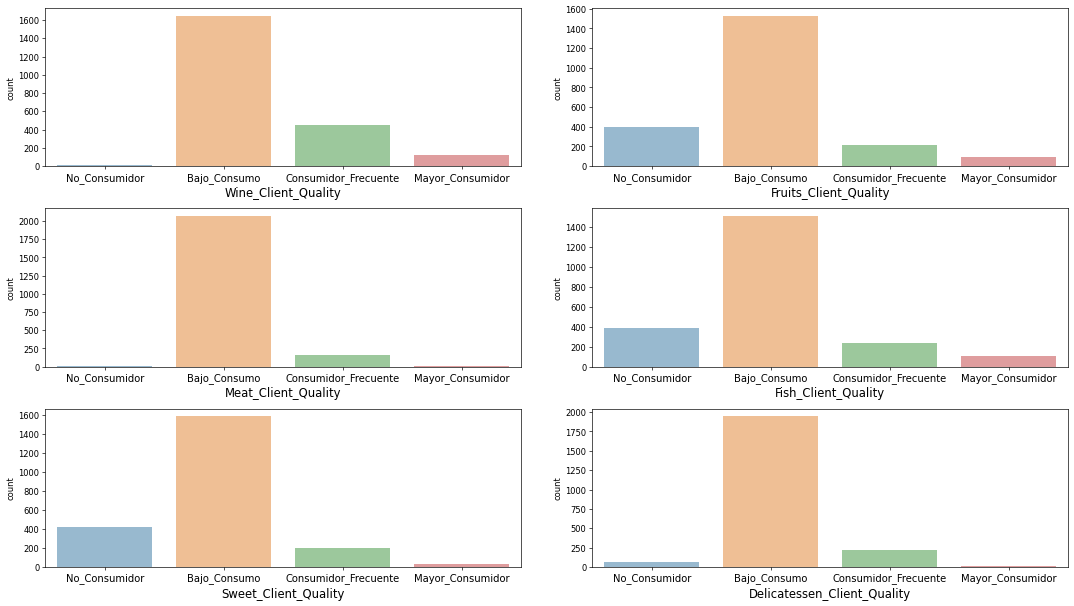

In [ ]:
plt.figure(figsize=(18,13),dpi=60)

for i in range(0, len(categoricas_producto)):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x = df[categoricas_producto[i]], alpha = 0.5)
    plt.xlabel(categoricas_producto[i],fontsize=14)
    plt.xticks(fontsize=12)
    #plt.ylim(400,700)
    plt.tight_layout()

plt.subplots_adjust(wspace=0.15);

- Observamos una distribución similar en los acumulados de tipos de cliente para cada categoría de producto.

- Destaca la elevada cantidad de clientes con bajo consumo en cada una de las 6 categorías de productos.

### **Manipulación y Creación de Variables Numéricas.**

Ahora necesitamos optimizar algunas de las variables numéricas con las que ya contamos o crear unas nuevas. Nuestro objetivo es que estas variables cumplan con las siguientes características:

- Puedan agrupar los valores de otras variables de la misma naturaleza.

- Aumenten el valor de la información original.

- Nos permitan responder a preguntas e hipótesis de negocio.

- Faciliten su integración en los algoritmos que emplearemos posteriormente (ejemplo: algoritmo apriori)

- Comenzamos generando la variable "Monetary". En la que sumaremos el acumulado de compras de todas las categorías de producto correspondiente a cada uno de los clientes.

In [ ]:
df['Monetary'] = df['MntWines'] +  df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

- De igual manera establecemos la variable "Frecuency". Dónde sumamos el total de compras realizadas por cada cliente. Independientemente de cuál haya sido la plataforma de venta.

In [ ]:
df['Frecuency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

- Continuamos generando la variable "Campañas". En la que registramos la suma de las repuestas afirmativas (1 por cada campaña) de cada cliente y para cada una de las seis campañas publicitarias que se han lanzado.

In [ ]:
df['Campañas'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Accepted_Last']

In [ ]:
df.filter(['Monetary','Frecuency','Campañas']).head(3)

,Monetary,Frecuency,Campañas
0,1617,22,1
1,27,4,0
2,776,20,0


### **Análisis de Variables Numéricas**
A continuación procedemos a estudiar las variables numéricas creadas anteriormente, a través de la visualización de la distribución de sus valores.

In [ ]:
df_numericas = df.filter(['Recency','Frecuency','Monetary'])
numericas = ['Recency','Frecuency','Monetary']

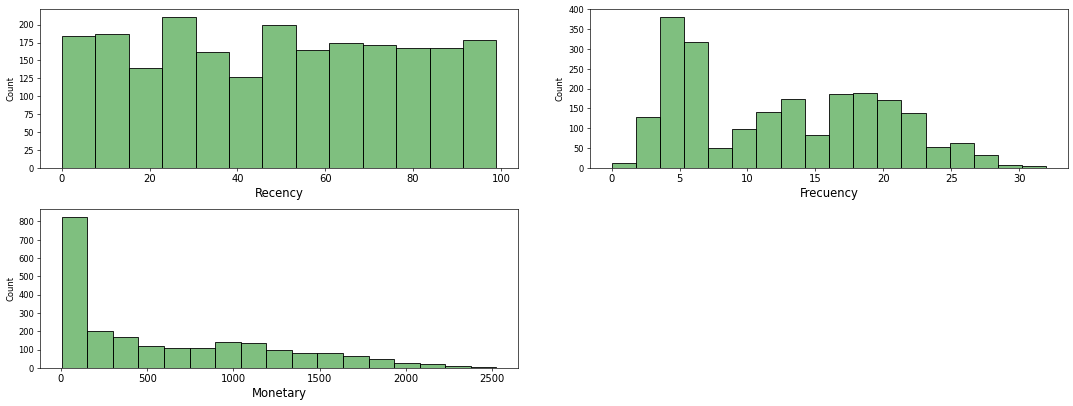

In [ ]:
plt.figure(figsize=(18,13),dpi=60)

for i in range(0, len(numericas)):
    plt.subplot(4, 2, i + 1)
    sns.histplot(x = df[numericas[i]], color = 'green', alpha = 0.5)
    plt.xlabel(numericas[i],fontsize=14)
    plt.xticks(fontsize=12)
    plt.tight_layout()

plt.subplots_adjust(wspace=0.15);

- Los acumulados de días pasados desde la última compra ("Recency") reflejan una distribución sin ningún sesgo destacable.

- El acumulado del número de compras ("Frecuency") no refleja un sesgo tan marcado. Observamos un buen número de clientes que han efectuado de 2 a 6 compras. Junto con otro grupo de clientes con un comportamiento más homogéneo, que han realizado de unas 10 a 23 compras aproximadamente.

- Comprobamos que la mayoría de clientes corresponden a acumulados de compras ("Monetary") con las cuantías más ajustadas. La franja de gasto total de hasta unos 1000 dólares agrupa a gran parte de los compradores.

## **Estudio de perfil de cliente**
Vamos a describir el perfil de los clientes consumidores de vino, a través del análisis cruzado con el resto de variables.

- En primer lugar visualizamos los agrupamientos de clientes, según diversas características categóricas y su clasificación como compradores de vino.

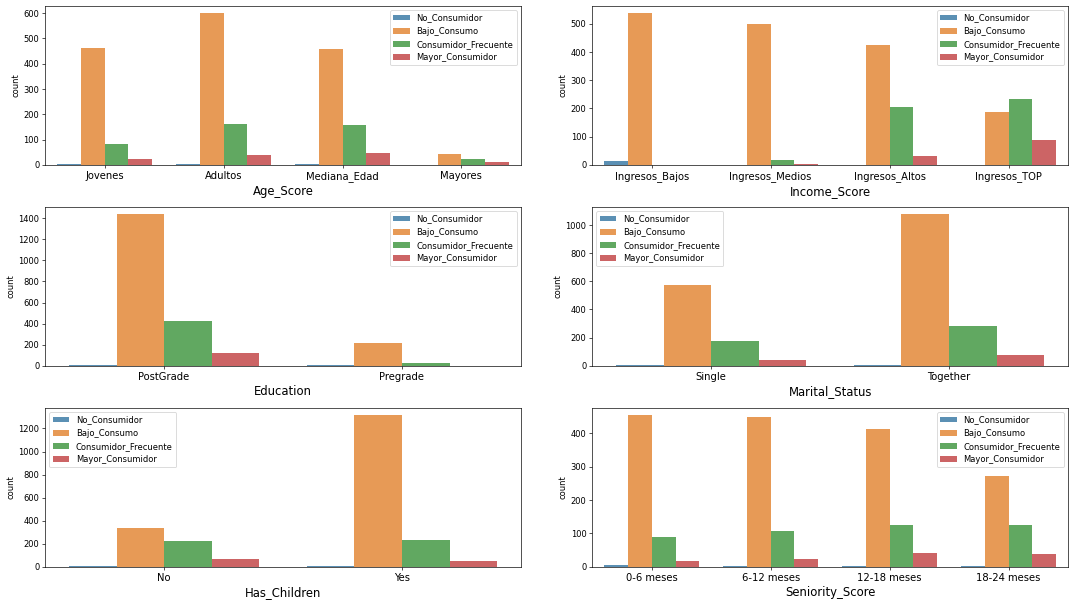

In [ ]:
df_consumidores_vino = df.filter(['Age_Score','Income_Score','Education','Marital_Status','Has_Children','Seniority_Score','Wine_Client_Quality','Monetary'])
cosumidores_vino = ['Age_Score','Income_Score','Education','Marital_Status','Has_Children','Seniority_Score']

plt.figure(figsize=(18,13),dpi=60)

for i in range(0, len(cosumidores_vino)):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x = df_consumidores_vino[cosumidores_vino[i]], hue=df_consumidores_vino['Wine_Client_Quality'], alpha = 0.8)
    plt.xlabel(cosumidores_vino[i],fontsize=14)
    plt.xticks(fontsize=12)
    plt.tight_layout()
    plt.legend(loc='best')

plt.subplots_adjust(wspace=0.15);

- El segmento de edad es un claro diferenciador en lo que a compra de vino se refiere. Siendo los clientes adultos los que reflejan un consumo más elevado.  

- El aumento de los ingresos supone un descenso en los clientes con bajo consumo de vino. Por otro lado, los grandes consumidores de vino no paran de crecer a medida que lo hace el nivel de ingresos.

- Anteriormente comprobamos que el número de clientes con estudios superiores era claramente mayor a los que cuentan con estudios básicos. Esta tendencia también se traslada al nivel de consumo de vino.

- De igual manera un mayor número de clientes con pareja que solteros, también se refleja en un aumento proporcional de los diferentes compradores de vino.  

- Los clientes con al menos 1 hijo menor de edad, son más numerosos y también consumen más vino en promedio que aquellos que no tienen hijos. A su vez los padres o madres reflejan una tendencia hacia un menor consumo de vino.

- La clasificación de los clientes según su antigüedad tampoco supone un factor diferenciador en el nivel de gasto en vino.

A continuación vamos a visualizar la distribución de los valores de RFM

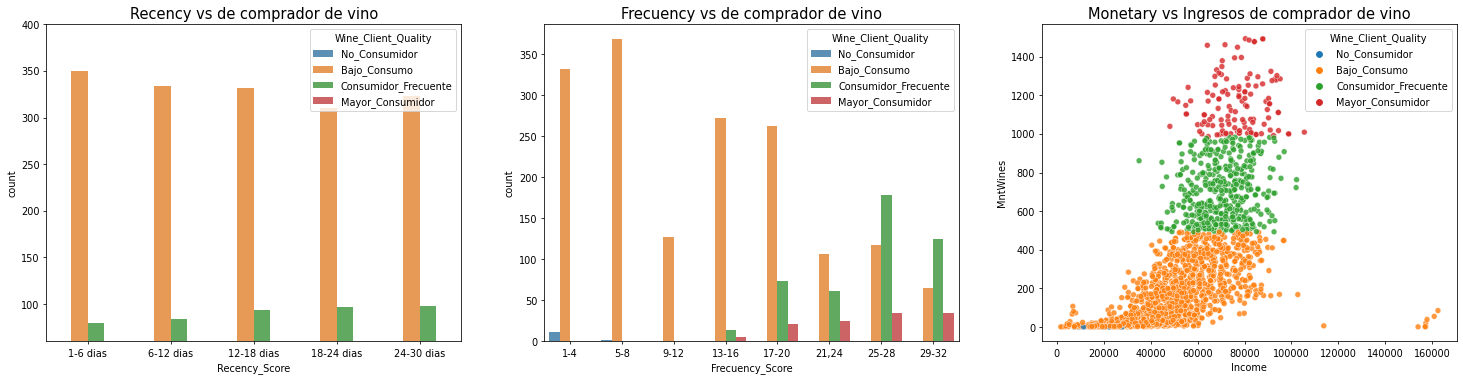

In [ ]:
df['Frecuency_Score'] = pd.qcut(df['Frecuency'], q=8, labels= ['1-4','5-8','9-12','13-16','17-20','21,24','25-28','29-32'])
df_consumidores_vino_1 = df.filter(['Income','Frecuency_Score','Recency_Score','MntWines','Wine_Client_Quality','Monetary'])

plt.figure(figsize=(26,6),dpi=70)
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=df_consumidores_vino_1 ,x='Recency_Score',hue='Wine_Client_Quality', alpha = 0.8)
ax1.set_title('Recency vs de comprador de vino', size = 15)
ax1.set_ylim(60,400)

plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=df_consumidores_vino_1 ,x='Frecuency_Score',hue='Wine_Client_Quality', alpha = 0.8)
ax2.set_title('Frecuency vs de comprador de vino', size = 15)

plt.subplot(1, 3, 3)
ax3 = sns.scatterplot(data=df_consumidores_vino_1 ,x='Income',y='MntWines',hue='Wine_Client_Quality', alpha = 0.8)
ax3.set_title('Monetary vs Ingresos de comprador de vino', size = 15);

- Cabe destacar el aumento de los clientes que consumen una mayor cantidad de vino a la vez que aumenta la frecuencia de compra.

- También queda clara la tendencia a consumir más vino a la vez que suben los ingresos de los clientes.

## **Análisis RFM**

- El método RFM permite determinar cuáles son los mejores clientes y segmentarlos de forma efectiva. Teniendo en cuenta cuándo realizaron su última compra (Recency), con qué frecuencia lo hacen (Frecuency) y cuánto se gastan (Monetary). Estas tres medidas han demostrado ser eficaces para predecir la disposición de un cliente a responder afirmativamente a una campaña de marketing u oferta.

- La segmentación efectiva de clientes simplifica la interpretación de los datos. Favoreciendo un análisis menos complejo que con otras fórmulas y facilitando su integración en el lanzamiento de promociones más personalizadas, relevantes y con una tasa de conversión más elevada.  

- En primer lugar vamos a generar un nuevo dataframe. En el que registraremos las citadas variables "Recency", "Frecuency" y "Monetary" junto con el ID correspodiente de cada cliente (que nos permitirá una porterior unión con el dataset original en función de los resultados obtenidos).   



In [ ]:
df_RFM = df.filter(['ID','Recency','Frecuency','Monetary'])

- Ahora vamos a segmentar en 5 partes iguales todos los valores de las variables "Recency", "Frecuency" y "Monetary".

- Aprovechamos el mismo orden de estos valores para asignarles una puntuación (5 a 1 para Recency y 1 a 5 para Frecuency/Monetary).

- Registramos todas estas puntuaciones en tres nuevas variables.

A continuación vamos a emplear varios métodos. Con el objetivo de determinar el número idóneo de clusters en los que vamos a segmentar a los clientes. Y lo haremos tomando como referencia únicamente las variables RFM de puntuación generadas anteriormente.

In [ ]:
df_RFM['Recency_Score'] = pd.qcut(df_RFM['Recency'], q=5, labels = [5,4,3,2,1])
df_RFM['Frecuency_Score'] = pd.qcut(df_RFM['Frecuency'], q=5, labels = [1,2,3,4,5])
df_RFM['Monetary_Score'] = pd.qcut(df_RFM['Monetary'], q=5, labels = [1,2,3,4,5])
df_RFM.iloc[:,4:].head(3)

,Recency_Score,Frecuency_Score,Monetary_Score
0,3,5,5
1,4,1,1
2,4,4,4


### **Técnicas de Clusterización**
La incógnita más importante, en el momento de aplicar algun método de clusterización, es la misma elección del número de clústeres.

No existe un criterio objetivo para su elección. Pero sí que contamos con diferentes métodos, que nos ayudan a seleccionar una cifra conveniente de clústeres y de cara a optimizar la agrupación de los datos. Vamos a desarrollarlos a continuación.

#### **Curva de Elbow (Método del Codo)**

- Utiliza los valores de la inercia, obtenidos tras aplicar el K-means a diferentes números de Clústers (desde 1 a N). La inercia, la suma de las distancias al cuadrado de cada objeto del Clúster a su centroide.

- En el siguiente gráfico resultante buscamos un punto de poca profundidad y que suponga un cambio en la pendiente. La coordenada de dicho punto en el eje x, se puede entender como una muy buena referencia para elegir el número óptimo de clústeres.

- Este método es inexacto y está sujeto a nuestra interpretación. Pero resulta ser muy útil porque muestra como el aumento de clústeres contribuye a separarlos de manera significativa.

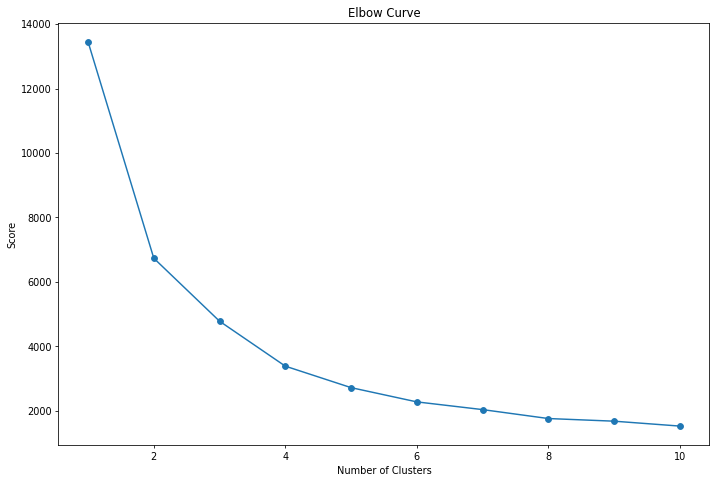

In [ ]:
inertia = []
plt.figure(figsize=(12,8),dpi=70)
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=100).fit(df_RFM.iloc[:,4:])
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)
    plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.plot(range(1,11), inertia, marker='o');

**Vamos a establecer que el valor 4 supone el mayor cambio de tendencia (codo) en la curva y una primera referencia para el número óptimo de clústeres de segmentación de los clientes.**

#### **Método de la Silueta**

- Estudia la distancia de separación entre los grupos resultantes.

- Muestra una medida de cuán cerca está cada punto de un clúster de los puntos en los clústeres vecinos. Constituyendo una técnica, significativa y clara, de puntuar y evaluar visualmente el número aconsejable de clústeres.

- En primer lugar obtenemos el score correspodiente a diferentes configuraciones de siluetas, según el número de clústeres comprendido en un rango de 2 a 6.

- A continuación procedemos a visualizar cada una de estas configuraciones.

For n_clusters = 2 The average silhouette_score is : 0.6911263221837027
For n_clusters = 3 The average silhouette_score is : 0.6613630513201318
For n_clusters = 4 The average silhouette_score is : 0.6312089595279705
For n_clusters = 5 The average silhouette_score is : 0.620634000917188
For n_clusters = 6 The average silhouette_score is : 0.6041571519558505


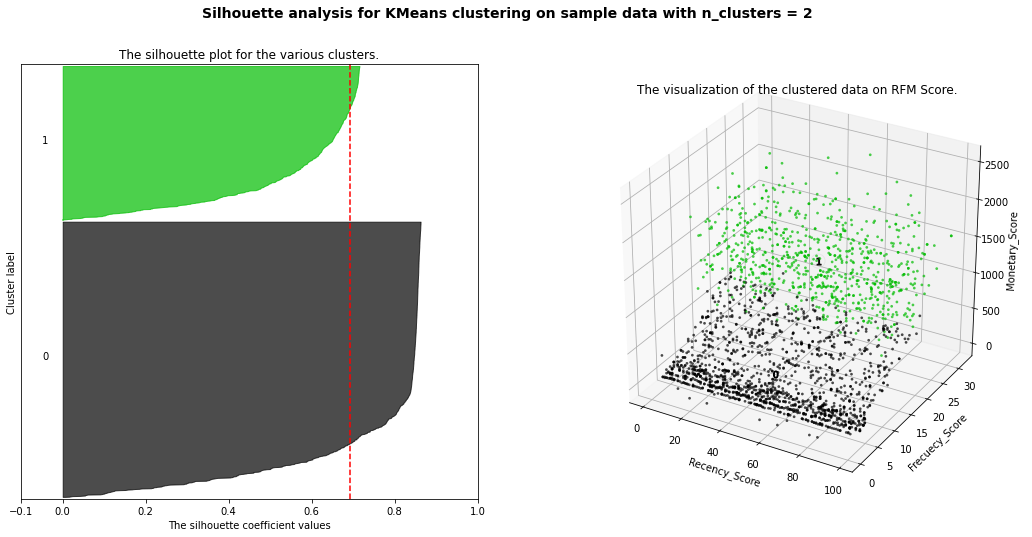

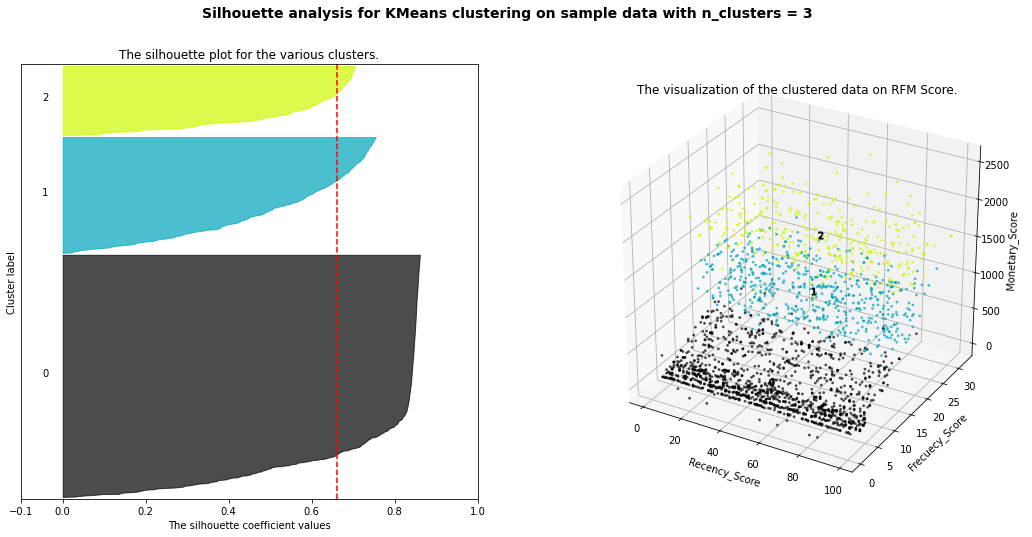

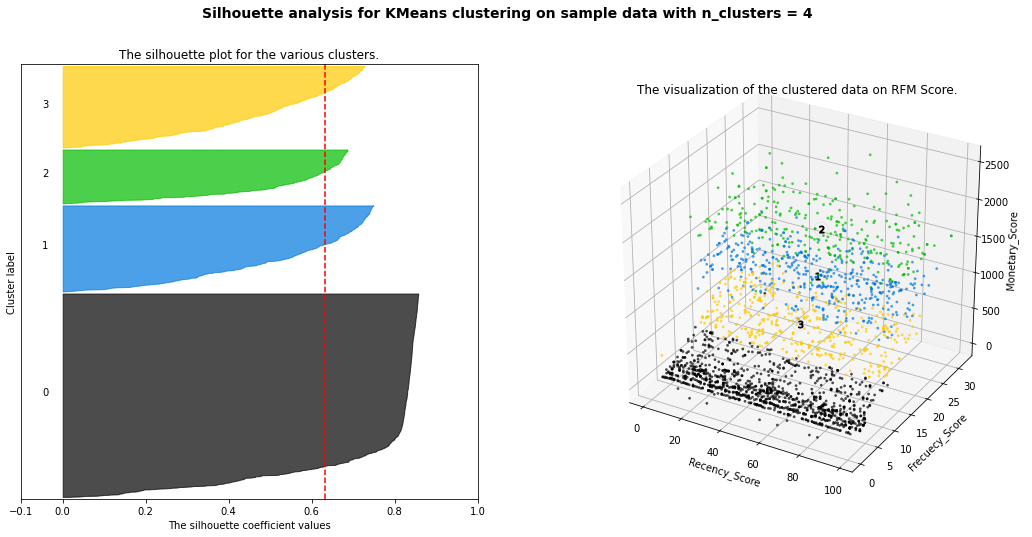

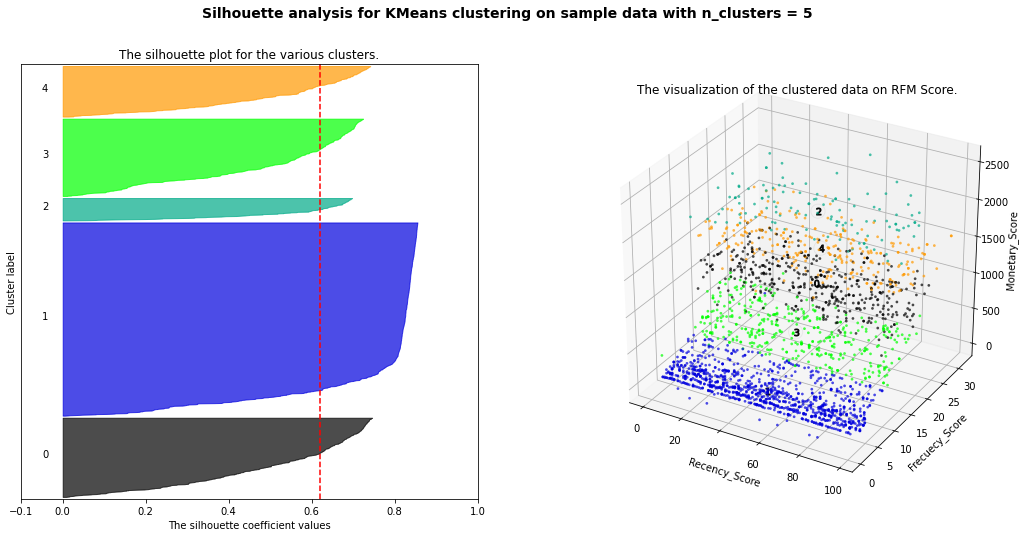

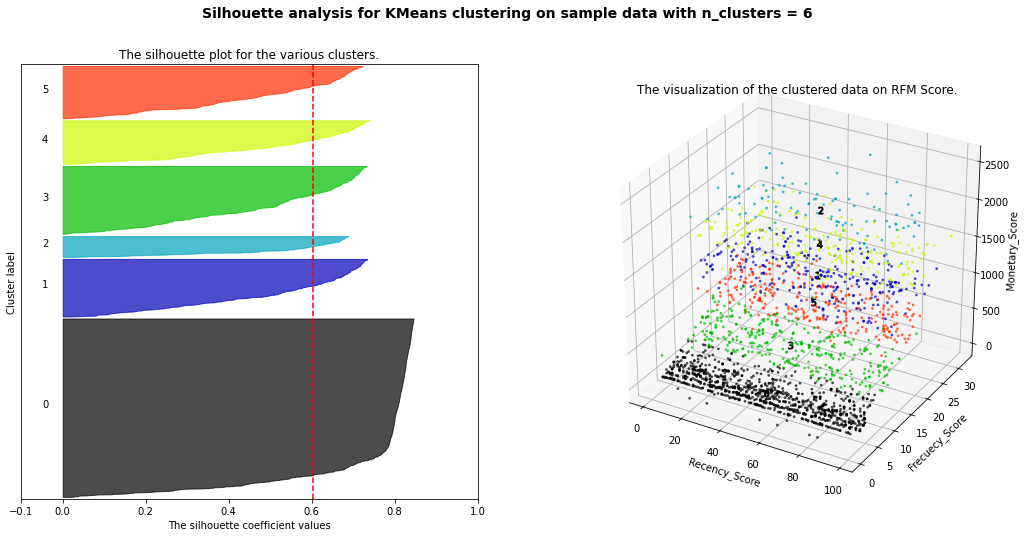

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]
X = df_RFM.iloc[:,1:4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    #fig, (ax1, ax2) = plt.subplots(1, 2)

    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    fig.set_size_inches(18, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_


    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='o',
                c="white", alpha=0.05, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], c[2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data on RFM Score.")
    ax2.set_xlabel("Recency_Score")
    ax2.set_ylabel("Frecuecy_Score")
    ax2.set_zlabel("Monetary_Score")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

A partir de la obtención de los scores y visualización según el número de clústeres podemos establecer que:

- **Las puntuaciones descienden a medida que aumenta el número de clústeres. Entendemos que una segmentación en 4 clústeres sigue siendo una buena medida. Ya que también está refrendada por la Curva de Elbow vista anteriormente (valor a baja altura y que refleje un cambio de tendencia).**

- **En cuanto a las visualizaciones, debemos fijarnos en la forma de las "cuchillas" a la derecha del límite vertical rojo, marcado por el correspondiente coeficiente de silueta. Cuanto más compactos y parecidos en proporción sean dichos segmentos, mayor será la idoneidad de seleccionar entre un determinado rango de clústeres (en nuestro caso 2, 3, 4, 5 o 6).**

- **Podemos determinar que el Método de Silueta también reafirma la elección de la segmentación de clientes en 4 clústeres. Dada su mayor cohesión entre clústeres y en comparación al resto de pruebas con diferente número de clústeres (2, 3, 5 y 6).**

#### **Clústering Jerárquico Divisivo con Dendograma**

- Muestra las jerarquías de acuerdo con las distancias que existen entre los elementos del conjunto de datos. De igual manera podemos entenderlo de arriba hacia abajo (top-down).

- Comienza asignando todos los elementos a un solo clúster y sigue el algoritmo hasta que cada elemento es un clúster individual. Se beneficia de la información completa sobre la distribución global, al ir haciendo las particiones.

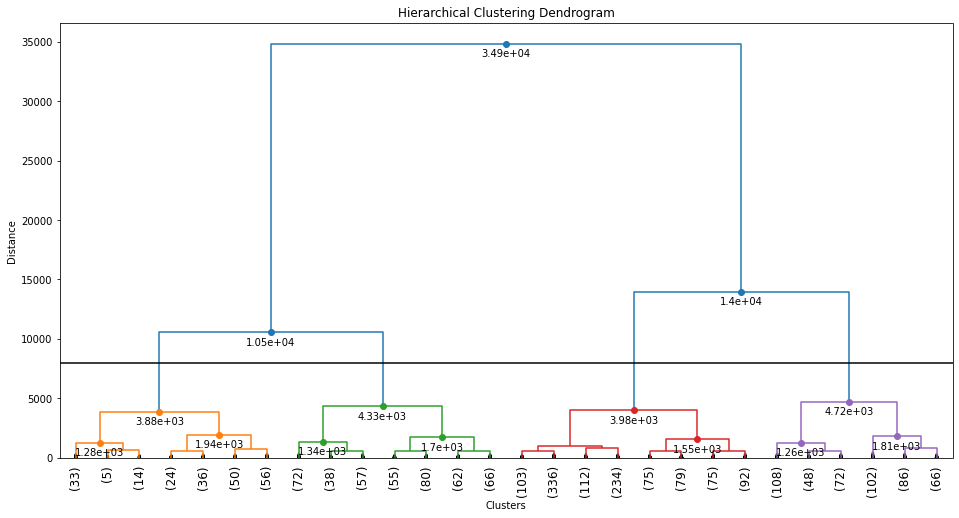

In [ ]:
distances = linkage(df_RFM.iloc[:,1:4], 'ward')

plt.figure(figsize=(16, 8))

fancy_dendrogram(
    distances,
    truncate_mode='lastp',
    p=28,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    max_d=8000,
    annotate_above=1000
)

plt.show()

- **En la parte inferior del dendograma comprobamos una clara segmentación en 4 agrupaciones.**

- **Tras desarrollar tres técnicas diferentes de clusterización (Elbow, Silueta y Dendograma), hemos verificado la idoneidad de trabajar con 4 clústers de cliente a partir de ahora.**

### **Aplicación del Algoritmo K-means**

Agrupa objetos en k grupos basándose en sus características. Dicho agrupamiento se realiza minimizando la suma de las distancias (la cuadrática es la más extendida) entre cada objeto y el centroide de su grupo o clúster.

#### **Definición de Clústeres**

- En primer lugar generamos una nueva variable (df_RFM_Kmeans) en la que copiamos el dataset generado anteriormente (df_RFM).

- Generamos otra nueva variable (km) a la que asignamos la aplicación del algoritmo KMeans en cuatro clústeres.

- A continuación aplicamos el método definido anteriormente (km) sobre las columnas que registraban los scores de RFM de nuestro dataset df_RFM_Kmeans.

- Por último generamos una nueva columna "label". En la que registramos las etiquetas resultado generadas por KMeans y mostramos el aspecto final del dataset por pantalla.  

In [ ]:
df_RFM_Kmeans = df_RFM.copy()
km = KMeans(n_clusters=4, random_state=100)
clusters = km.fit_predict(df_RFM_Kmeans.iloc[:,4:])
df_RFM_Kmeans["label"] = clusters
df_RFM_Kmeans.head(5)

,ID,Recency,Frecuency,Monetary,Recency_Score,Frecuency_Score,Monetary_Score,label
0,5524,58,22,1617,3,5,5,2
1,2174,38,4,27,4,1,1,0
2,4141,26,20,776,4,4,4,1
3,6182,26,6,53,4,2,1,0
4,5324,94,14,422,1,3,3,3


0#### **Visualización Radar Chart de Clústeres**

Muestra datos multivariados, en forma de un gráfico bidimensional de variables cuantitativas y representadas en ejes que se originan en el centro. La posición relativa y el ángulo de los ejes normalmente no son informativos.

- Comenzamos generando una nueva variable en la que asignamos una etiqueta a cada uno de los 4 clústeres numéricos.  

In [ ]:
df_RFM_Kmeans = df_RFM_Kmeans.assign(Label_Cliente = lambda x: x.label.map(lambda value: 'Clientes_Nuevos' if value == 0 else
                                                                                         'Clientes_Vip' if value == 1 else
                                                                                         'Clientes_Loss' if value == 2 else
                                                                                         'Clientes_Low'))

- A continuación recuperamos los centroides (centroids) correspondientes a las puntuaciones RFM del dataset df_RFM_Kmeans.

- Generamos un nuevo dataset en el que registramos los centroides correspondientes a cada uno de los 4 clústeres de segmentación.

- Los mostramos por pantalla.

In [ ]:
centroids = km.cluster_centers_
dfRadar=pd.DataFrame(data=centroids,  columns=df_RFM_Kmeans.columns[4:-2])
dfRadar['cluster']=range(0,dfRadar.shape[0])

dfRadar

,Recency_Score,Frecuency_Score,Monetary_Score,cluster
0,4.012433,1.419183,1.525755,0
1,4.270531,3.809984,3.858293,1
2,1.948490,4.289520,4.429840,2
3,1.492843,1.846626,1.944785,3


Empleamos el método "make_spider" para visualizar por separado:

- Cada uno de los clústeres en función del score atribuído a sus variables RFM.
- Esta graficación permite una rápida y efectiva comparación de las características de nuestra segmentación de clientes.  

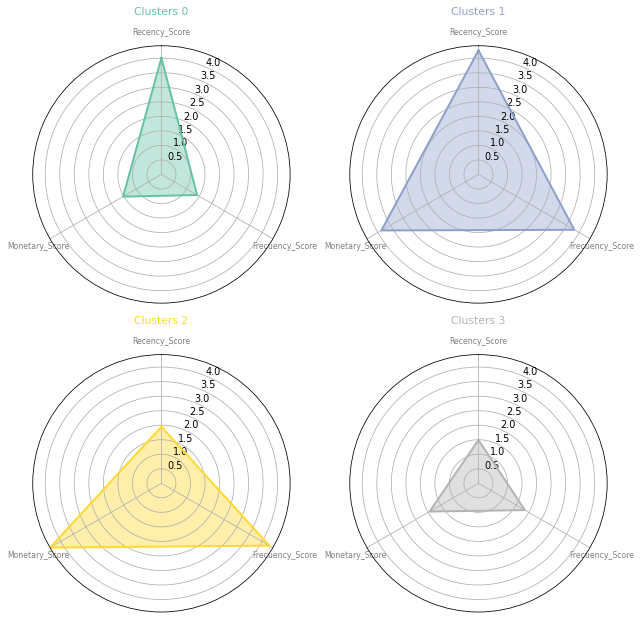

In [ ]:
my_dpi=70
plt.figure(figsize=(750/my_dpi, 750/my_dpi), dpi=my_dpi)

my_palette = plt.cm.get_cmap("Set2", len(dfRadar.index))

for row in range(len(dfRadar.index)):
    make_spider( dfRadar, row=row, title='Clusters ' + str(dfRadar['cluster'][row]), color=my_palette(row))

Vamos a describir los clústeres de segmentación en función de las visualizaciones anteriores:

- Cluster 0 --> Clientes_Recientes: ha pasado poco tiempo desde su última compra. Pero son los que compran con menor frecuencia y un menor nivel de gasto total.

- Cluster 1 --> Clientes_Vip: son los que han comprado más recientemente, con una frecuencia y nivel de gasto total muy destacables.

- Cluster 2 --> Clientes_Antiguos: ha pasado un tiempo considerable desde su última compra, pero mantienen los niveles más altos de frecuencia y nivel de gasto total.

- Cluster 3 --> Clientes_Perdidos: son aquellos cuya última compra es la más alejada en el tiempo. También reflejan una frecuencia y nivel total de gasto muy ajustados.  

#### **Visualización 3D de la Distribución de Clústeres**

- Definimos los parámetros de la graficación dinámica de los clústeres (tamaño, color y leyendas) para obtener una visualización clara y reveladora de la aplicación de K-means.

In [ ]:
import plotly as py
import plotly.graph_objs as go

Scene = dict(xaxis = dict(title  = 'Recency'),yaxis = dict(title  = 'Frecuency'),zaxis = dict(title  = 'Monetary'))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter3d(x=df_RFM_Kmeans['Recency'][df_RFM_Kmeans.label == 0],
                     y=df_RFM_Kmeans['Frecuency'][df_RFM_Kmeans.label == 0],
                     z=df_RFM_Kmeans['Monetary'][df_RFM_Kmeans.label == 0],
                     showlegend=True,name='Clientes_Recientes',
                     mode='markers',marker=dict(color = 'blue', size= 7, line=dict(color= 'black',width = 1))))

fig.add_trace(go.Scatter3d(x=df_RFM_Kmeans['Recency'][df_RFM_Kmeans.label == 1],
                     y=df_RFM_Kmeans['Frecuency'][df_RFM_Kmeans.label == 1],
                     z=df_RFM_Kmeans['Monetary'][df_RFM_Kmeans.label == 1],
                     showlegend=True,name='Clientes_Vip',
                     mode='markers',marker=dict(color = 'red', size= 7, line=dict(color= 'black',width = 1))))

fig.add_trace(go.Scatter3d(x=df_RFM_Kmeans['Recency'][df_RFM_Kmeans.label == 2],
                     y=df_RFM_Kmeans['Frecuency'][df_RFM_Kmeans.label == 2],
                     z=df_RFM_Kmeans['Monetary'][df_RFM_Kmeans.label == 2],
                     showlegend=True,name='Clientes_Antiguos',
                     mode='markers',marker=dict(color = 'green', size= 7, line=dict(color= 'black',width = 1))))

fig.add_trace(go.Scatter3d(x=df_RFM_Kmeans['Recency'][df_RFM_Kmeans.label == 3],
                     y=df_RFM_Kmeans['Frecuency'][df_RFM_Kmeans.label == 3],
                     z=df_RFM_Kmeans['Monetary'][df_RFM_Kmeans.label == 3],
                     showlegend=True,name='Clientes_Perdidos',
                     mode='markers',marker=dict(color = 'yellow', size= 7, line=dict(color= 'black',width = 1))))


layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)

fig.update_layout(title="Clusterización RFM con algoritmo K-Means",
   legend_title="Clusters",
   font=dict(family="Arial", size=12, color="black"))

fig.show();

- **Observamos una eficiente segmentación y distribución de valores. En la que muy pocos registros ocupan el espacio propio de otro clúster.**

- **Verificamos el notable aumento de "Monetary" a la vez que lo hace "Frecuency". Mucho más pronunciado en los clústeres "Clientes_Vip" y "Clientes_Perdidos".**

- **De igual manera el cruce de las variables "Recency" y "Monetary" supone un claro elemento diferenciador de las 4 segmentaciones. Siendo "Clientes_Vip" y "Clientes_Recientes" los que han comprado más recientemente (como era de esperar). Pero con una suma total de gasto muy diferente.**

### **Detección de Anomalías**

En nuestro conjunto de datos, vamos a identificar aquellos clientes anomalos que se encuentran alejados del resto. Una vez los hayamos localizado, estableceremos si prescindir de ellos aumenta:

- La idoneidad de la segmentación de clientes.
- El rendimiento de las normas establecidas por el método Apriori.  

#### **Aplicación del Algoritmo Isolation Forest en Variables RFM**

- En primer lugar generamos una nueva variable (hcols) en la que registramos los nombres de las columnas RFM.

- Generamos otra nueva variable (iso) a la que asignamos la aplicación del algoritmo Isolation Forest, tras ajustar diversos de sus parámetros.

- A continuación aplicamos el método definido anteriormente (iso) sobre las columnas RFM de nuestro dataset df_RFM_Kmeans.

- Por último generamos una nueva columna "outliers_iso". En la que clasificamos a los clientes según si son considerados anómalos (-1) o no (1). Y mostramos su acumulado total por pantalla.

In [ ]:
hcols=["Recency","Frecuency","Monetary"]
iso = IsolationForest(n_estimators=100, contamination = 0.1 ,max_features = 1.0 )
iso.fit(df_RFM_Kmeans[hcols])
df_RFM_Kmeans["outliers_iso"]=iso.predict(df_RFM_Kmeans[hcols])

df_RFM_Kmeans["outliers_iso"].value_counts()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



 1    2012
-1     224
Name: outliers_iso, dtype: int64

**Comprobamos que los anómalos suponen un 10% del total de los clientes.**

Procedemos a visualizar de nuevo la distribución de clientes según RFM y carácter anómalo.

In [ ]:
Scene = dict(xaxis = dict(title  = 'Recency'),yaxis = dict(title  = 'Frecuency'),zaxis = dict(title  = 'Monetary'))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter3d(x=df_RFM_Kmeans['Recency'][df_RFM_Kmeans.outliers_iso == 1],
                     y=df_RFM_Kmeans['Frecuency'][df_RFM_Kmeans.outliers_iso == 1],
                     z=df_RFM_Kmeans['Monetary'][df_RFM_Kmeans.outliers_iso == 1],
                     showlegend=True,name='Clientes_Normales',
                     mode='markers',marker=dict(color = 'green', size= 7, line=dict(color= 'black',width = 1))))

fig.add_trace(go.Scatter3d(x=df_RFM_Kmeans['Recency'][df_RFM_Kmeans.outliers_iso == -1],
                     y=df_RFM_Kmeans['Frecuency'][df_RFM_Kmeans.outliers_iso == -1],
                     z=df_RFM_Kmeans['Monetary'][df_RFM_Kmeans.outliers_iso == -1],
                     showlegend=True,name='Clientes_Anómalos',
                     mode='markers',marker=dict(color = 'purple', size= 8, line=dict(color= 'black',width = 1))))

fig.update_layout(title="Detección de Anómalos con Isolation Forest",
   legend_title="Clusters",
   font=dict(family="Arial", size=12, color="black"))

fig.show()

**Podemos observar que:**

- **Los clientes anómalos son aquellos con un mayor volumen de gastos ("Monetary").**

- **La variables "Recency" y "Frecuency" no son diferenciadoras entre clientes anómalos y aquellos que no lo son.**

#### **Conclusiones sobre Detección de Anomalías**

- **Debemos tener en cuenta que ya procedimos a la eliminación de diversos outliers en el apartado "Tratamiento de Outliers".**

- **Podemos encontrar la mayoría de anómalos entre aquellos clientes con un mayor nivel total de gastos. Dichos niveles tampoco distan mucho del de los clientes más cercanos. Independientemente del clúster al que pertenezcan.**

- **Como ya pudimos comprobar en las visualizaciones de los clústeres, los clientes con mayor gasto se encuentran repartidos claramente entre los segmentos "Clientes_Vip" y "Clientes_Antiguos".**

- **Todos estos hechos nos inducen a descartar la eliminación de aquellos clientes clasificados como anómalos. Ya que esta eliminación no supondría una mejora evidente en la segmentación de clientes.**

- **De igual manera posteriormente comprobaremos la repercusión de esta posible eliminación de anómalos, a través del método que aplicaremos a continuación.**

# **BASKET ANALYSIS CON REGLAS DE ASOCIACIÓN**

A través de la concurrencia en el conjunto de datos, el método de reglas de asociación nos va a ayudar a descubrir correlaciones significativas entre diferentes productos, categorías y la segmentación de clientes. Estas reglas se fundamentan en los siguientes parámetros:

- Soporte: probabilidad básica de que ocurra un evento. Mide la proporción de transacciones en las que aparece un conjunto de elementos.

- Confianza: es la probabilidad condicional de un suceso consecuente dado un suceso antecedente.

- Elevación: es la relación entre lo observado y lo esperado. Mide la probabilidad de que un artículo se compre cuando se compra otro, teniendo en cuenta la popularidad de ambos.

Teniendo en cuenta estos parámetros, vamos a emplear el algoritmo Apriori. Que es capaz de generar conjuntos de elementos a partir de datos transaccionales, que se utilizan para calcular estas reglas de asociación.

## **Aplicación del Algoritmo Apriori**

- En primer lugar vamos a generar un nuevo dataset "df_compras" en el que juntaremos las variables más relevantes y manipuladas anteriormente, junto con su correspondiente label fruto del desarrollo del algoritmo KMeans.

- A continuación mostramos los primeros registros del dataset resultante.

In [ ]:
df_compras = (
              df.filter(['ID','Income_Score','Age_Score','Education','Marital_Status',
                         'Wine_Client_Quality', 'Fruits_Client_Quality','Meat_Client_Quality',
                         'Fish_Client_Quality','Sweet_Client_Quality','Delicatessen_Client_Quality'])

                .merge(df_RFM_Kmeans.filter(['ID','label']), on='ID')

             ).reindex(columns=['ID','label','Income_Score','Age_Score','Education','Marital_Status',
                                'Wine_Client_Quality', 'Fruits_Client_Quality','Meat_Client_Quality',
                                'Fish_Client_Quality', 'Sweet_Client_Quality','Delicatessen_Client_Quality'])

df_compras.head()

,ID,label,Income_Score,Age_Score,Education,Marital_Status,Wine_Client_Quality,Fruits_Client_Quality,Meat_Client_Quality,Fish_Client_Quality,Sweet_Client_Quality,Delicatessen_Client_Quality
0,5524,2,Ingresos_Altos,Mediana_Edad,PostGrade,Single,Consumidor_Frecuente,Consumidor_Frecuente,Bajo_Consumo,Mayor_Consumidor,Consumidor_Frecuente,Bajo_Consumo
1,2174,0,Ingresos_Medios,Mediana_Edad,PostGrade,Single,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo
2,4141,1,Ingresos_TOP,Adultos,PostGrade,Together,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo,Consumidor_Frecuente,Bajo_Consumo,Bajo_Consumo
3,6182,0,Ingresos_Bajos,Jovenes,PostGrade,Together,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo
4,5324,3,Ingresos_Altos,Jovenes,PostGrade,Together,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo,Bajo_Consumo


- El algoritmo Apriori requiere que todas las variables (salvo ID) registren sus valores como 1 (concordante con uno de los posibles valores) o 0 (para el resto de casos).

- Para ello empleamos el método "get_dummies" y registramos todas las nuevas variables resultantes, junto con sus valores convertidos a 1's y 0's, en un nuevo dataset llamado "df_onehot_compras".

- Visualizamos por pantalla el primero de los registros resultantes.

In [ ]:
df_compras.label = df_compras.label.astype(str)
df_onehot_compras = pd.get_dummies(df_compras)
df_onehot_compras.head(1).T

,0
ID,5524
label_0,0
label_1,0
label_2,1
label_3,0
Income_Score_Ingresos_Bajos,0
Income_Score_Ingresos_Medios,0
Income_Score_Ingresos_Altos,1
Income_Score_Ingresos_TOP,0
Age_Score_Jovenes,0


**El algoritmo Apriori identifica los elementos de un conjunto de datos. Extiende dicho conjunto si sus ítems superan un determinado umbral de referencia.**

- Comenzamos aplicando el algoritmo Apriori sobre nuestro dataset "df_onehot_compras" (prescindiendo de los ID), marcando el soporte mínimo y registrando los resultados en la variable "frequent_itemsets".

- A continuación vamos establecer las reglas de asociación sobre los conjuntos de datos generados anteriormente. Para ello marcamos la métrica "confianza" como referencia, un mínimo umbral de frecuencia de los conjuntos de elementos (0.01) y registramos los resultados en la variable "rules".

- Por último mostramos los primeros 20 registros ordenados según el parámetro "confianza". En los que podemos observar una clara dependencia (confianza = 1.0) entre varios antecedentes y sus consecuentes.

In [ ]:
frequent_itemsets = apriori(df_onehot_compras.iloc[:,1:], min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)
rules.sort_values('confidence', ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2440478,"(Income_Score_Ingresos_Bajos, Sweet_Client_Qua...",(Meat_Client_Quality_Bajo_Consumo),0.022361,0.926208,0.022361,1.0,1.079672,0.001650,inf
1790867,"(Income_Score_Ingresos_Bajos, Sweet_Client_Qua...",(Delicatessen_Client_Quality_Bajo_Consumo),0.026834,0.869857,0.026834,1.0,1.149614,0.003492,inf
18163,"(label_0, Fruits_Client_Quality_No_Consumidor,...",(Wine_Client_Quality_Bajo_Consumo),0.016995,0.737478,0.016995,1.0,1.355973,0.004461,inf
263071,"(Income_Score_Ingresos_Bajos, Fish_Client_Qual...",(Meat_Client_Quality_Bajo_Consumo),0.020572,0.926208,0.020572,1.0,1.079672,0.001518,inf
133171,"(Delicatessen_Client_Quality_Bajo_Consumo, lab...",(Wine_Client_Quality_Bajo_Consumo),0.065295,0.737478,0.065295,1.0,1.355973,0.017141,inf
2059855,"(Income_Score_Ingresos_Altos, Sweet_Client_Qua...",(Education_PostGrade),0.031306,0.885957,0.031306,1.0,1.128723,0.003570,inf
906732,"(Age_Score_Jovenes, Marital_Status_Together, F...",(Meat_Client_Quality_Bajo_Consumo),0.011628,0.926208,0.011628,1.0,1.079672,0.000858,inf
1790865,"(Income_Score_Ingresos_Bajos, Sweet_Client_Qua...",(Meat_Client_Quality_Bajo_Consumo),0.026834,0.926208,0.026834,1.0,1.079672,0.001980,inf
2157918,"(Income_Score_Ingresos_Medios, label_3, Fruits...","(Meat_Client_Quality_Bajo_Consumo, Education_P...",0.013417,0.818426,0.013417,1.0,1.221858,0.002436,inf
2157919,"(Income_Score_Ingresos_Medios, label_3, Fruits...","(Wine_Client_Quality_Bajo_Consumo, Education_P...",0.013417,0.642218,0.013417,1.0,1.557103,0.004800,inf


- Ahora recuperamos los primeros 20 registros que tienen el valor "mayor consumidor de vino" como uno de sus consecuentes. Ordenándolos según los parámetros "confianza" y "elevación".

- **Observamos que el clúster "label 2" (clientes antiguos) es un claro antecedente que conlleva al mayor consumo de vino.**

In [ ]:
rules[rules["consequents"].apply(lambda x: 'Wine_Client_Quality_Mayor_Consumidor' in str(x))].sort_values(['confidence','lift'],ascending=(False,False)).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1305684,"(Education_PostGrade, Income_Score_Ingresos_TO...",(Wine_Client_Quality_Mayor_Consumidor),0.035331,0.054114,0.010733,0.303797,5.613976,0.008822,1.358636
1305809,"(Sweet_Client_Quality_Bajo_Consumo, Education_...",(Wine_Client_Quality_Mayor_Consumidor),0.038014,0.054114,0.011181,0.294118,5.435100,0.009124,1.340004
1305705,"(Income_Score_Ingresos_TOP, Delicatessen_Clien...","(Wine_Client_Quality_Mayor_Consumidor, Educati...",0.037567,0.053220,0.010733,0.285714,5.368547,0.008734,1.325492
611245,"(Income_Score_Ingresos_TOP, Delicatessen_Clien...",(Wine_Client_Quality_Mayor_Consumidor),0.037567,0.054114,0.010733,0.285714,5.279811,0.008701,1.324240
1305825,"(Sweet_Client_Quality_Bajo_Consumo, Income_Sco...","(Wine_Client_Quality_Mayor_Consumidor, Educati...",0.039803,0.053220,0.011181,0.280899,5.278066,0.009062,1.316616
611306,"(Sweet_Client_Quality_Bajo_Consumo, Income_Sco...",(Wine_Client_Quality_Mayor_Consumidor),0.039803,0.054114,0.011181,0.280899,5.190826,0.009027,1.315372
1302282,"(Education_PostGrade, Marital_Status_Together,...",(Wine_Client_Quality_Mayor_Consumidor),0.039803,0.054114,0.011181,0.280899,5.190826,0.009027,1.315372
1670831,"(Sweet_Client_Quality_Bajo_Consumo, Education_...",(Wine_Client_Quality_Mayor_Consumidor),0.050537,0.054114,0.013864,0.274336,5.069553,0.011129,1.303476
1302303,"(Marital_Status_Together, Income_Score_Ingreso...","(Wine_Client_Quality_Mayor_Consumidor, Educati...",0.042934,0.053220,0.011181,0.260417,4.893207,0.008896,1.280153
609199,"(Marital_Status_Together, Income_Score_Ingreso...",(Wine_Client_Quality_Mayor_Consumidor),0.042934,0.054114,0.011181,0.260417,4.812328,0.008857,1.278944


A continuación vamos a observar todos aquellos antecedentes que aparecen más veces, marcando "mayor consumidor de vino" como consecuente.

- **Parece claro que un alto nivel educativo, de ingresos, estar en pareja o consumir con menor frecuencia otro tipo de productos, son claros indicadores del mayor consumo de vino.**

In [ ]:
rules[rules["consequents"].apply(lambda x: 'Wine_Client_Quality_Mayor_Consumidor' in str(x))].sort_values(['confidence','lift'],ascending=(False,False))['antecedents'].value_counts().head(10)

(Education_PostGrade)                                      212
(Meat_Client_Quality_Bajo_Consumo)                         172
(Delicatessen_Client_Quality_Bajo_Consumo)                 166
(Income_Score_Ingresos_TOP)                                154
(Sweet_Client_Quality_Bajo_Consumo)                        148
(Fruits_Client_Quality_Bajo_Consumo)                       123
(Marital_Status_Together)                                  116
(label_2)                                                  112
(Fish_Client_Quality_Bajo_Consumo)                         104
(Meat_Client_Quality_Bajo_Consumo, Education_PostGrade)     85
Name: antecedents, dtype: int64

- **Por último observamos que los clústeres que agrupan clientes con el mayor consumo de vino son: clúster 2 (Clientes Antiguos) con 71 y clúster 1 (Clientes Vip) con 50.**

In [ ]:
x = df_compras[df_compras['Wine_Client_Quality'] == 'Mayor_Consumidor'].reset_index()
x.filter(['label','ID']).groupby('label').count()

,ID
label,
1,50
2,71


## **Conclusiones Complementarias**

- Procedemos a cruzar los tramos de ingresos totales con los clientes que consumen más vino. Obteniendo el acumulado de gastos y su media.

- **Observamos que el acumulado de clientes que consumen más vino son los que tienen un nivel de ingresos más alto.**

- **Salvo los clientes con ingresos más bajos, el resto de clientes tiene una media de gasto en vino muy similar.**

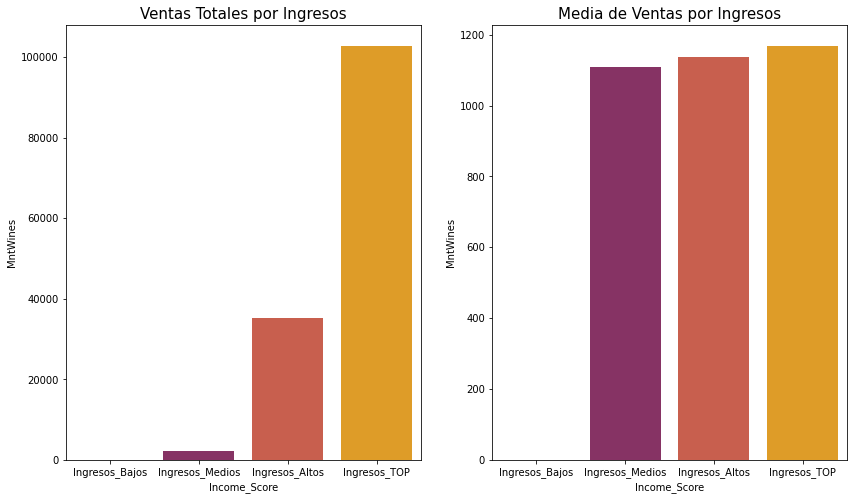

In [ ]:
df_conclusiones = df[df['Wine_Client_Quality'] == 'Mayor_Consumidor']

fig, axs = plt.subplots(1, 2, figsize=(14, 8))

h1 = df_conclusiones[['Income_Score', 'MntWines']].groupby('Income_Score').sum().reset_index()
h2 = df_conclusiones[['Income_Score', 'MntWines']].groupby('Income_Score').mean().reset_index()

sns.barplot(x = 'Income_Score', y = 'MntWines', data = h1, palette = 'inferno', ax = axs[0])
axs[0].set_title('Ventas Totales por Ingresos', size = 15);

sns.barplot(x = 'Income_Score', y = 'MntWines', data = h2, palette = 'inferno', ax = axs[1])
axs[1].set_title('Media de Ventas por Ingresos', size = 15);

- Procedemos a cruzar los tramos de edad con los clientes que consumen más vino. Obteniendo el acumulado de gastos y su media.

- **Observamos que el acumulado de clientes que consumen más vino aumenta a medida que lo hace su edad. Salvo en el tramo de clientes con la edad más elevada, dónde se aprecia un claro descenso.**

- **El nivel de gasto medio de los mayores consumidores de vino es similar, independientemente de su edad.**

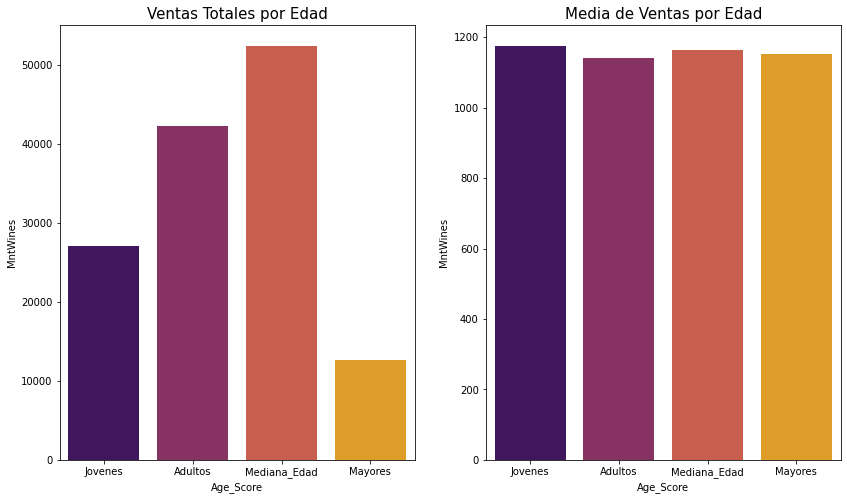

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

h1 = df_conclusiones[['Age_Score', 'MntWines']].groupby('Age_Score').sum().reset_index()
h2 = df_conclusiones[['Age_Score', 'MntWines']].groupby('Age_Score').mean().reset_index()

sns.barplot(x = 'Age_Score', y = 'MntWines', data = h1, palette = 'inferno', ax = axs[0])
axs[0].set_title('Ventas Totales por Edad', size = 15);

sns.barplot(x = 'Age_Score', y = 'MntWines', data = h2, palette = 'inferno', ax = axs[1])
axs[1].set_title('Media de Ventas por Edad', size = 15);

- Procedemos el nivel de educación con los clientes que consumen más vino. Obteniendo el acumulado de gastos y su media.

- **Observamos que el mayor acumulado de clientes que consumen más vino corresponde a aquellos que tienen estudios superiores. Este hecho también refleja el claro sesgo inicial de nuestro conjunto de datos. En el que contamos con una mayor cantidad de clientes con estudios superiores.**

- **El nivel de gasto medio de los mayores consumidores de vino es similar, independientemente de su nivel de educación.**

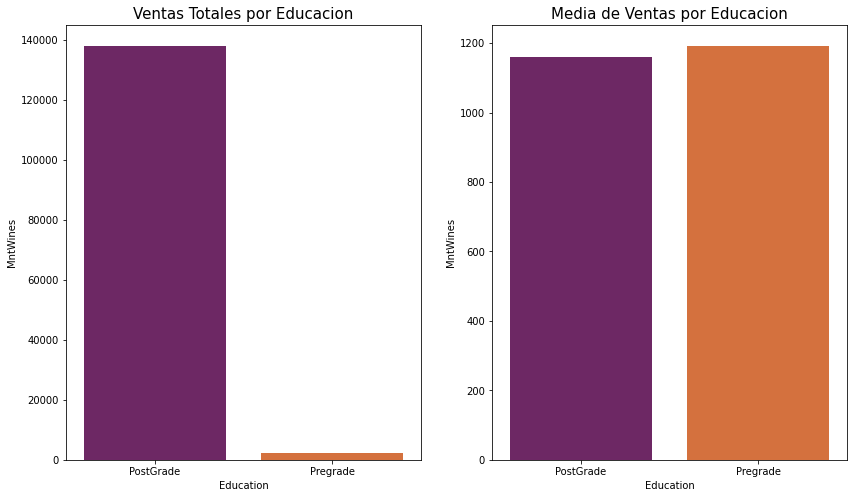

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

h1 = df_conclusiones[['Education', 'MntWines']].groupby('Education').sum().reset_index()
h2 = df_conclusiones[['Education', 'MntWines']].groupby('Education').mean().reset_index()

sns.barplot(x = 'Education', y = 'MntWines', data = h1, palette = 'inferno', ax = axs[0])
axs[0].set_title('Ventas Totales por Educacion', size = 15);

sns.barplot(x = 'Education', y = 'MntWines', data = h2, palette = 'inferno', ax = axs[1])
axs[1].set_title('Media de Ventas por Educacion', size = 15);

- Procedemos el estado civil con los clientes que consumen más vino. Obteniendo el acumulado de gastos y su media.

- **Observamos que el mayor acumulado de clientes que consumen más vino corresponde a aquellos que tienen pareja. Este hecho también refleja el claro sesgo inicial de nuestro conjunto de datos. En el que contamos con una mayor cantidad de clientes con pareja respecto a los solteros.**

- **El nivel de gasto medio de los mayores consumidores de vino es similar, independientemente de su estado civil.**

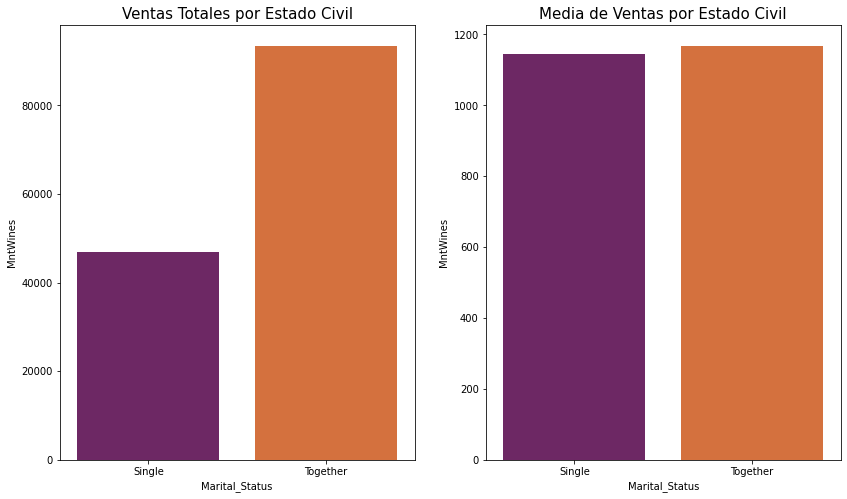

In [ ]:
# Conclusion 4

fig, axs = plt.subplots(1, 2, figsize=(14, 8))

h1 = df_conclusiones[['Marital_Status', 'MntWines']].groupby('Marital_Status').sum().reset_index()
h2 = df_conclusiones[['Marital_Status', 'MntWines']].groupby('Marital_Status').mean().reset_index()

sns.barplot(x = 'Marital_Status', y = 'MntWines', data = h1, palette = 'inferno', ax = axs[0])
axs[0].set_title('Ventas Totales por Estado Civil', size = 15);

sns.barplot(x = 'Marital_Status', y = 'MntWines', data = h2, palette = 'inferno', ax = axs[1])
axs[1].set_title('Media de Ventas por Estado Civil', size = 15);